<body>
    <h1>Infrastructure Proximity and Socioeconomic Outcomes:</h1>
    <h2>A Machine Learning Approach to Urban Planning and Social Justice in the Netherlands</h2>
</body>

<h3>0.0: Introduction</h3>
<p>This project aims to the spatial distribution of urban infrastructure and its influence on socioeconomic indicators across neighborhoods in the Netherlands. The study explores how disparities in access to essential infrastructure, such as healthcare, schools, green spaces, impact individual outcomes. It aims to uncover patterns of inequality in infrastructure allocation, particularly in marginalized communities, which often face limited resources and environmental injustices. By analyzing these disparities, the research seeks to inform decesion makers on the strategic importance of certain infrastructre projects for inhabitants life quality and their potential life outcomes. By providing such insights, through leveraging supervised and unsupervised machine learning algorithms, this project strives to provide insights that can guide policymakers toward creating more equitable infrastructure solutions to improve socioeconomic outcomes and community well-being.</p>

<h3>1.0: Data preparation</h3>

<h4>1.1: Importing libraries</h4>

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import os

<h4>1.2: Loading the datasets</h4>

In [111]:
target_files = {
    "dataDemographics.csv": "dataDem",
    "dataProximity1.csv": "dataProx1",
    "dataProximity2.csv": "dataProx2",
    "dataProximity3.csv": "dataProx3",
    "dataProximity4.csv": "dataProx4",
    "dataProximity5.csv": "dataProx5",
    "dataProximity6.csv": "dataProx6",
}

# Find the target files and load them into individual variables
for file_name, var_name in target_files.items():
    found = False
    for root, dirs, files in os.walk("."):
        if file_name in files:
            # Construct the full file path
            file_path = os.path.join(root, file_name)
            print(f"Found '{file_name}' at: {file_path}")
            globals()[var_name] = pd.read_csv(file_path)
            print(f"CSV file '{file_name}' loaded successfully into variable '{var_name}'")
            found = True
            break
    
    if not found:
        print(f"The file '{file_name}' was not found.")

Found 'dataDemographics.csv' at: ./dataDemographics.csv
CSV file 'dataDemographics.csv' loaded successfully into variable 'dataDem'
Found 'dataProximity1.csv' at: ./dataProximity1.csv
CSV file 'dataProximity1.csv' loaded successfully into variable 'dataProx1'
Found 'dataProximity2.csv' at: ./dataProximity2.csv
CSV file 'dataProximity2.csv' loaded successfully into variable 'dataProx2'
Found 'dataProximity3.csv' at: ./dataProximity3.csv
CSV file 'dataProximity3.csv' loaded successfully into variable 'dataProx3'
Found 'dataProximity4.csv' at: ./dataProximity4.csv
CSV file 'dataProximity4.csv' loaded successfully into variable 'dataProx4'
Found 'dataProximity5.csv' at: ./dataProximity5.csv
CSV file 'dataProximity5.csv' loaded successfully into variable 'dataProx5'
Found 'dataProximity6.csv' at: ./dataProximity6.csv
CSV file 'dataProximity6.csv' loaded successfully into variable 'dataProx6'


<h4>1.3: Inspecting the datasets</h4>

<h5>1.3.1: Inspecting the Demographics dataset</h5>
<p>This dataset contains key statistical figures for districts and neighborhoods across the Netherlands, covering various socioeconomic, demographic, and infrastructure-related variables.</p>

In [114]:
pd.set_option('display.max_columns', None) # To see all the columns

print(f"The shape of the `dataDem` dataset: {dataDem.shape}")
display(dataDem.head())
print(dataDem.dtypes)
dataDem_missing = dataDem.isnull().sum()
print(f"In the dataDem dataset there are {dataDem_missing.sum()} missing values")

The shape of the `dataDem` dataset: (17681, 122)


,gwb_code_10,gwb_code_8,regio,gm_naam,recs,gwb_code,ind_wbi,a_inw,a_man,a_vrouw,a_00_14,a_15_24,a_25_44,a_45_64,a_65_oo,a_ongeh,a_gehuwd,a_gesch,a_verwed,a_w_all,a_nw_all,a_marok,a_antaru,a_suri,a_tur,a_ov_nw,a_geb,p_geb,a_ste,p_ste,a_hh,a_1p_hh,a_hh_z_k,a_hh_m_k,g_hhgro,bev_dich,a_woning,g_wozbag,p_1gezw,p_mgezw,p_bewndw,p_leegsw,p_koopw,p_huurw,p_wcorpw,p_ov_hw,p_e_o_w,p_bjj2k,p_bjo2k,g_ele,g_ele_ap,g_ele_tw,g_ele_hw,g_ele_2w,g_ele_vw,g_ele_hu,g_ele_ko,g_gas,g_gas_ap,g_gas_tw,g_gas_hw,g_gas_2w,g_gas_vw,g_gas_hu,g_gas_ko,p_stadsv,a_opl_lg,a_opl_md,a_opl_hg,p_arb_pp,p_arb_wn,p_arb_zs,a_inkont,g_ink_po,g_ink_pi,p_ink_li,p_ink_hi,g_hh_sti,p_hh_li,p_hh_hi,p_hh_lkk,p_hh_osm,p_hh_110,p_hh_120,m_hh_ver,a_soz_wb,a_soz_ao,a_soz_ww,a_soz_ow,a_jz_tn,p_jz_tn,a_wmo_t,p_wmo_t,a_bedv,a_bed_a,a_bed_bf,a_bed_gi,a_bed_hj,a_bed_kl,a_bed_mn,a_bed_oq,a_bed_ru,a_pau,a_bst_b,a_bst_nb,g_pau_hh,g_pau_km,a_m2w,g_afs_hp,g_afs_gs,g_afs_kv,g_afs_sc,g_3km_sc,a_opp_ha,a_lan_ha,a_wat_ha,pst_mvp,pst_dekp,ste_mvs,ste_oad,Unnamed: 120,Unnamed: 121
0,NL00,0,Nederland,Nederland,Land,NL00,.,17475415,8686536,8788879,2711731,2139221,4347005,4819923,3457535,8558739,6678969,1377923,859784,1858730,2447178,414186,171413,358266,422030,1081283,179441,10,170972,10,8043443,3097117,2331454,2614872,"2,1",519,7966331,290,64,36,96,4,57,43,29,14,0,82,18,2810,2040,2870,3000,3370,4190,2140,3300,1250,840,1180,1400,1650,2150,970,1470,6.3,3565510,5520240,4215660,69,83,17,13960800,"35,7","29,1","40,0","20,0","33,6","40,0","20,0","6,3","6,5","9,8","12,4","88,4",407970,747060,166620,3233130,463600,"10,5",.,.,2104540,77875,289660,364075,156870,168595,478950,332725,235795,8686420,6980745,1705675,"1,1",258,666595,"1,0","0,9","0,7","0,7","10,7",4154338,3367109,787228,.,.,2,2024,NaN,NaN
1,GM0014,14,Groningen,Groningen,Gemeente,GM0014,.,233273,116177,117096,28437,49538,69799,50403,35096,153241,55478,16374,8180,29771,28507,1278,4077,3367,1771,18014,2233,10,1846,8,136508,80059,30882,25567,"1,7",1257,118922,225,40,60,96,4,40,59,33,27,0,83,17,2250,1830,2570,2740,3170,3960,1910,2740,1190,950,1320,1510,1690,2290,1000,1460,.,31590,74950,84970,65,87,13,187900,"31,9","26,8","46,0","17,0","27,3","59,2","11,7","11,2","10,7","15,7","18,7","11,0",10100,8890,2100,32730,5465,"8,5",16610,71,26220,200,2030,4255,2350,1765,6535,5135,3945,94430,71655,22775,"0,7",509,6170,"0,8","0,7","0,5","0,7","9,6",19796,18560,1236,.,.,1,3312,NaN,NaN
2,WK001400,1400,Centrum,Groningen,Wijk,WK001400,1,22735,11875,10860,630,9745,7790,2670,1905,19275,2075,1055,330,4310,2645,60,305,220,160,1895,85,4,100,4,17935,14360,2910,675,"1,3",10059,12546,218,14,86,92,8,16,84,27,57,0,86,14,2020,1900,2670,2920,3140,3680,1930,2490,1090,1010,1570,1830,2530,2650,1030,1430,.,1370,10300,10090,62,86,14,19000,"26,2","23,8","58,1","11,7","20,5","79,5","5,3","14,4","11,7","17,6","20,8","0,0",780,530,190,1810,110,"1,5",850,37,4510,5,195,1190,385,275,970,605,885,4150,3190,960,"0,2",1838,370,"0,3","0,3","0,3","0,6","15,9",241,226,16,.,.,1,6353,NaN,NaN
3,BU00140000,140000,Binnenstad-Noord,Groningen,Buurt,BU00140000,1,4510,2380,2125,80,2120,1560,475,270,3945,350,175,45,845,470,10,50,50,30,340,15,4,10,2,3640,2975,575,90,"1,2",12192,2257,223,13,87,90,10,13,87,21,67,0,95,5,2140,2020,2940,2420,.,.,2100,2400,1230,1140,1730,2030,.,.,1160,1680,.,300,2150,1870,63,86,14,3800,"24,5","22,3","59,8","10,6","19,5","81,8","4,3","13,6","10,0","15,9","19,0","-1,9",130,100,40,260,20,"1,2",160,35,975,5,35,320,95,60,200,115,150,740,540,195,"0,2",1989,45,"0,4","0,3","0,4","0,3","15,5",39,37,2,9712,1,1,6561,NaN,NaN
4,BU00140001,140001,Binnenstad-Zuid,Groningen,Buurt,BU00140001,1,6410,3405,3000,135,2945,2180,680,470,5580,475,285,75,1160,755,15,95,70,50,535,20,2,25,4,5140,4175,820,150,"1,2",11651,3562,223,9,91,89,11,13,87,27,60,1,96,4,2080,1970,3110,3620,4220,3980,1990,2750,1170,1100,1850,2310,3360,2340,1110,1630,.,360,3070,2930,63,85,15,5500,"24,9","22,8","61,5","9,8","19,6","82,6","4,8","14,8","12,1","17,7","21,0","-1,9",230,140,40,440,25,"1,2",195,30,1620,0,50,515,120,110,295,1

gwb_code_10      object
gwb_code_8        int64
regio            object
gm_naam          object
recs             object
                 ...   
pst_dekp         object
ste_mvs          object
ste_oad          object
Unnamed: 120    float64
Unnamed: 121    float64
Length: 122, dtype: object
In the dataDem dataset there are 35366 missing values


<h6>Interpretting the output:</h6>
<p>The dataset includes 122 columns representing various metrics such as population characteristics, household types, housing conditions, energy consumption, education levels, income distributions, and social security data. The dataset contains some missing values, with 35,366 missing entries overall. Moreover, there is also problem with the data types and the missing values which are indicated with a dot, instead of the conventional NaN.</p>

<h5>1.3.2: Insepcting the Proximity dataset</h5>
<p>Before we could inspect the proximity dataset we have to combine them into one dataset, as it was divided up to different parts.</p>

In [117]:
# Function to merge the dataframes
def merge_dataframes(dataframes, key_column, final_name='dataProx'):
    """
    Merges multiple DataFrames on a specified key column, with error handling, duplication checks,
    and dropping overlapping columns.

    Parameters:
    - dataframes (list of pd.DataFrame): List of DataFrames to merge.
    - key_column (str): The column to merge on.
    - final_name (str): Name for the final merged DataFrame.

    Returns:
    - pd.DataFrame: The final merged DataFrame.
    """
    merged_data = dataframes[0]  
    merged_sources = set()  

    for i, df in enumerate(dataframes[1:], start=2): 
        # Check if the current DataFrame is already merged
        if id(df) in merged_sources:
            print(f"DataFrame {i} has already been merged. Skipping.")
            continue

        # Check for the key column in the current df
        if key_column not in df.columns:
            print(f"DataFrame {i} is missing the key column '{key_column}' and will be skipped.")
            continue

        # Drop overlapping columns
        columns_to_drop = [col for col in df.columns if col in merged_data.columns and col != key_column]
        if columns_to_drop:
            print(f"DataFrame {i}: Dropping overlapping columns {columns_to_drop}")
            df = df.drop(columns=columns_to_drop)

        # Merge the current df with the accumulated result
        try:
            merged_data = pd.merge(merged_data, df, on=key_column, how='inner')
            merged_sources.add(id(df)) 
        except Exception as e:
            print(f"An error occurred while merging DataFrame {i}: {e}")
            continue

    print(f"Final merged data is stored in '{final_name}'.")
    return merged_data


# Merge dataProx into one df
dataframes = [dataProx1, dataProx2, dataProx3, dataProx4, dataProx5, dataProx6]
dataProx = merge_dataframes(dataframes, key_column='DistrictsAndNeighbourhoods')

# Uncomment to get the merged Proximity dataset
# dataProx.to_csv('dataProximity.csv', index=False)

DataFrame 2: Dropping overlapping columns ['ID', 'Encoding_3']
DataFrame 3: Dropping overlapping columns ['ID', 'Encoding_3']
DataFrame 4: Dropping overlapping columns ['ID', 'Encoding_3']
DataFrame 5: Dropping overlapping columns ['ID', 'Encoding_3']
DataFrame 6: Dropping overlapping columns ['ID', 'Encoding_3']
Final merged data is stored in 'dataProx'.


In [118]:
print(f"The shape of the `dataProx` dataset: {dataProx.shape}")

# Missing values
dataProx_missing = dataProx.isnull().sum()
print(f"In the dataProx dataset there are {dataProx_missing.sum()} missing values")

display(dataProx.head())
print(dataProx.dtypes)

The shape of the `dataProx` dataset: (18116, 105)
In the dataProx dataset there are 0 missing values


,ID,DistrictsAndNeighbourhoods,Encoding_3,DistanceToLargeSupermarket_24,Within1Km_25,Within3Km_26,Within5Km_27,DistanceToShopForOtherDailyFood_28,DistanceToDepartmentStore_32,Within5Km_33,Within10Km_34,Within20Km_35,DistanceToCafeEtc_36,Within1Km_37,Within3Km_38,Within5Km_39,DistanceToCafeteriaEtc_40,Within1Km_41,Within3Km_42,Within5Km_43,Within1Km_45,Within3Km_46,Within5Km_47,DistanceToHotelEtc_48,Within5Km_49,Within105km_50,Within20Km_51,DistanceToDaycareCentres_52,Within1Km_53,Within3Km_54,Within5Km_55,DistanceToOutOfSchoolCare_56,Within1Km_57,Within3Km_58,Within5Km_59,DistanceToSchool_60,Within1Km_61,Within3Km_62,Within5Km_63,DistanceToSchool_64,Within3Km_65,Within5Km_66,Within10Km_67,DistanceToSchool_68,Within3Km_69,Within5Km_70,Within10Km_71,DistanceToSchool_72,Within3Km_73,Within5Km_74,Within10Km_75,DistanceToPublicGreenTotal_76,DistanceToParkOrPublicGarden_77,DistanceToRecreationalTerrain_78,DistanceToForest_79,DistanceToOpenNatTerrainTotal_80,DistanceToOpenDryNaturalTerrain_81,DistanceToOpenWetNaturalTerrain_82,DistanceToSemiPublicGreenTotal_83,DistanceToSportsArea_84,DistanceToAllotmentGarden_85,DistanceToRecreationalArea_86,DistanceToCemetery_87,DistanceToRecreationalInlandWaters_88,DistanceToMainRoadEntrance_89,DistanceToTrainStationAllTypes_90,DistanceToImportantTransferStation_91,DistanceToLibrary_92,DistanceToSwimmingPool_93,DistanceToArtificialIceSkatingRink_94,DistanceToMuseum_95,Within5Km_96,Within10Km_97,Within20Km_98,DistanceToPerformingArts_99,Within5Km_100,Within10Km_101,Within20Km_102,DistanceToPopMusicVenue_103,DistanceToCinema_104,Within5Km_105,Within10Km_106,Within20Km_107,DistanceToSauna_108,DistanceToTanningSalon_109,DistanceToAttraction_110,Within10Km_111,Within20Km_112,Within50Km_113,DistanceToFireStation_114,DistanceToGPPractice_5,Within1Km_6,Within3Km_7,Within5Km_8,DistanceToGPPost_9,DistanceToPharmacy_10,DistanceToHospital_11,Within5Km_12,Within10Km_13,Within20Km_14,DistanceToYouthHealthCentre_19,DistanceToPhysiotherapist_20,Within1Km_21,Within3Km_22,Within5Km_23
0,0,NL00,NL00,1.0,1.8,11.0,23.8,0.8,2.7,2.4,6.7,19.7,1.4,2.8,22.9,49.6,.,.,.,.,8.0,66.0,145.3,.,.,.,.,0.7,2.8,19.1,43.5,0.8,2.2,14.2,32.6,0.8,1.7,9.9,22.0,2.5,3.6,7.8,20.0,2.6,2.8,6.0,15.5,3.4,2.0,4.3,10.9,.,.,.,.,.,.,.,.,.,.,.,.,.,1.9,5.3,10.8,2.0,3.4,19.5,4.3,3.3,8.1,21.3,4.9,2.9,6.9,16.2,10.2,6.5,1.3,2.9,7.3,8.4,4.2,5.6,3.0,8.8,41.0,2.2,1.1,1.2,7.7,16.8,6.9,1.3,4.9,1.1,2.9,8.6,.,.,.,.,.
1,1,GM1680,GM1680,2.2,0.7,1.4,2.6,1.5,5.3,0.4,1.8,7.7,3.4,0.3,0.6,1.6,.,.,.,.,1.8,4.1,9.0,.,.,.,.,1.2,1.2,2.7,4.8,1.1,1.4,3.1,5.6,1.2,0.8,1.8,3.6,5.7,0.2,0.4,3.4,5.7,0.2,0.4,3.0,11.3,0.0,0.0,0.7,.,.,.,.,.,.,.,.,.,.,.,.,.,1.5,12.4,14.4,2.7,9.8,32.2,8.0,0.1,1.0,6.3,11.4,0.0,0.4,2.6,28.8,11.8,0.0,0.3,1.8,18.9,10.8,7.5,0.9,4.5,22.3,2.7,2.4,0.4,0.8,1.6,11.2,2.5,10.9,0.0,0.6,3.1,.,.,.,.,.
2,2,WK168000,WK168000,0.9,1.3,2.5,4.7,0.8,5.2,0.4,2.0,11.2,4.1,0.0,0.0,2.0,.,.,.,.,2.7,4.8,12.1,.,.,.,.,0.5,1.9,4.2,6.2,0.6,1.9,4.7,7.6,0.8,0.7,2.5,4.8,7.6,0.0,0.0,1.0,7.6,0.0,0.0,1.0,13.8,0.0,0.0,0.0,.,.,.,.,.,.,.,.,.,.,.,.,.,1.5,13.3,14.3,0.8,5.3,24.9,5.7,0.1,1.0,8.0,14.1,0.0,0.0,3.1,21.3,14.5,0.0,0.0,2.3,13.9,13.6,5.6,1.0,5.0,21.8,1.3,0.9,0.7,1.0,2.8,15.4,0.9,14.5,0.0,0.0,4.2,.,.,.,.,.
3,3,BU16800000,BU16800000,0.8,1.4,2.5,4.8,0.8,5.1,0.4,2.0,11.2,4.1,0.0,0.0,2.1,.,.,.,.,2.8,4.8,12.3,.,.,.,.,0.5,2.0,4.2,6.2,0.6,2.0,4.8,7.6,0.8,0.7,2.5,4.9,7.6,0.0,0.0,1.0,7.6,0.0,0.0,1.0,13.8,0.0,0.0,0.0,.,.,.,.,.,.,.,.,.,.,.,.,.,1.5,13.2,14.2,0.7,5.2,24.8,5.7,0.1,1.0,8.0,14.1,0.0,0.0,3.1,21.2,14.5,0.0,0.0,2.3,13.8,13.7,5.6,1.0,5.0,21.8,1.3,0.8,0.7,1.0,2.9,15.3,0.8,14.6,0.0,0.0,4.2,.,.,.,.,.
4,4,BU16800009,BU16800009,2.1,0.1,1.9,3.0,1.9,6.4,0.0,2.0,10.1,5.4,0.0,0.0,0.3,.,.,.,.,0.2,4.2,7.1,.,.,.,.,1.8,0.0,2.5,5.9,1.8,0.1,2.8,6.9,2.0,0.0,1.2,3.5,7.1,0.0,0.1,1.0,7.1,0.0,0.1,1.0,12.9,0.0,0.0,0.0,.,.,.,.,.,.,.,.,.,.,.,.,.,2.6,13.7,15.3,2.1,6.9,26.5,7.2,0.0,1.0,8.0,13.3,0.0,0.0,3.3,23.0,14.2,0.0,0.0,2.3,15.4,12.7,7.1,1.0,5.0,21.4,1.7,2.6,0.0,0.7,1.3,16.4,2.6,13.8,0.0,0.0,4.9,.,.,.,.,.


ID                                 int64
DistrictsAndNeighbourhoods        object
Encoding_3                        object
DistanceToLargeSupermarket_24     object
Within1Km_25                      object
                                   ...  
DistanceToYouthHealthCentre_19    object
DistanceToPhysiotherapist_20      object
Within1Km_21                      object
Within3Km_22                      object
Within5Km_23                      object
Length: 105, dtype: object


<h6>Interpretting the output:</h6>
<p>This dataset provides geographical and accessibility data related to districts and neighborhoods, featuring distances to various amenities (e.g., supermarkets, cafes, schools, recreational areas) and indicators of proximity showing the number of available facilities within a certain distance(e.g., within 1 km or 5 km). It enables analysis of how proximity to amenities correlates with characteristics or outcomes in our demograpics dataset, such as quality of life or urban planning decisions. The dataset was downloaded from the official website of the Dutch Statistics Bureau: https://www.cbs.nl/nl-nl. Similarly to the demographics dataset, this also contains many missing values and incorrect datatypes which has to be addressed.</p>

<h4>1.4: Data cleaning</h4>

<h5>1.4.1: Cleaning up the datasets for merging:</h5>

In [123]:
def clean_up(df, df_name):
    """
    Cleans a DataFrame by:
    1. Removing extra spaces in string columns.
    2. Replacing dots (".") with NaN.
    3. Standardizing separators.
    4. Converting variables into proper numeric types (float or int).
    5. Setting string-like columns to the 'string' dtype.

    Parameters:
    - df (pd.DataFrame): The DataFrame to clean.
    - df_name (str): Name of the DataFrame (for printing and logging).

    Returns:
    - pd.DataFrame: The cleaned DataFrame.
    """
    # Remove extra spaces
    df = df.apply(lambda col: col.map(lambda x: x.strip() if isinstance(x, str) else x))

    for col in df.columns:
        # Replace dots with NaN
        df[col] = df[col].map(lambda x: np.nan if x == '.' else x)
        
        # Check if the column is object or mixed type
        if df[col].dtype == object or df[col].dtype == 'string':
            # Try to convert numeric-like strings to float or int
            def convert_value(x):
                try:
                    # Replace ',' with '.' and attempt conversion
                    cleaned_value = str(x).replace(',', '.')
                    # Check if it can be converted to a float
                    num = float(cleaned_value)
                    # If it's an integer, cast it to int
                    return int(num) if num.is_integer() else num
                except (ValueError, TypeError):
                    # Leave non-numeric values as strings
                    return str(x)
            
            # Apply conversion to the entire column
            df[col] = df[col].apply(convert_value)

        # Set string-like columns to 'string' dtype if they still contain non-numeric values
        if df[col].apply(lambda x: isinstance(x, str)).all():
            df[col] = df[col].astype('string')

    # Output
    print(f"'{df_name}' is cleaned up and ready for merging.")
    display(df.head())
    print(df.dtypes)
    
    return df

dataDem = clean_up(dataDem, "dataDem")
dataProx = clean_up(dataProx, "dataProx")

'dataDem' is cleaned up and ready for merging.


,gwb_code_10,gwb_code_8,regio,gm_naam,recs,gwb_code,ind_wbi,a_inw,a_man,a_vrouw,a_00_14,a_15_24,a_25_44,a_45_64,a_65_oo,a_ongeh,a_gehuwd,a_gesch,a_verwed,a_w_all,a_nw_all,a_marok,a_antaru,a_suri,a_tur,a_ov_nw,a_geb,p_geb,a_ste,p_ste,a_hh,a_1p_hh,a_hh_z_k,a_hh_m_k,g_hhgro,bev_dich,a_woning,g_wozbag,p_1gezw,p_mgezw,p_bewndw,p_leegsw,p_koopw,p_huurw,p_wcorpw,p_ov_hw,p_e_o_w,p_bjj2k,p_bjo2k,g_ele,g_ele_ap,g_ele_tw,g_ele_hw,g_ele_2w,g_ele_vw,g_ele_hu,g_ele_ko,g_gas,g_gas_ap,g_gas_tw,g_gas_hw,g_gas_2w,g_gas_vw,g_gas_hu,g_gas_ko,p_stadsv,a_opl_lg,a_opl_md,a_opl_hg,p_arb_pp,p_arb_wn,p_arb_zs,a_inkont,g_ink_po,g_ink_pi,p_ink_li,p_ink_hi,g_hh_sti,p_hh_li,p_hh_hi,p_hh_lkk,p_hh_osm,p_hh_110,p_hh_120,m_hh_ver,a_soz_wb,a_soz_ao,a_soz_ww,a_soz_ow,a_jz_tn,p_jz_tn,a_wmo_t,p_wmo_t,a_bedv,a_bed_a,a_bed_bf,a_bed_gi,a_bed_hj,a_bed_kl,a_bed_mn,a_bed_oq,a_bed_ru,a_pau,a_bst_b,a_bst_nb,g_pau_hh,g_pau_km,a_m2w,g_afs_hp,g_afs_gs,g_afs_kv,g_afs_sc,g_3km_sc,a_opp_ha,a_lan_ha,a_wat_ha,pst_mvp,pst_dekp,ste_mvs,ste_oad,Unnamed: 120,Unnamed: 121
0,NL00,0,Nederland,Nederland,Land,NL00,NaN,17475415,8686536,8788879,2711731,2139221,4347005,4819923,3457535,8558739,6678969,1377923,859784,1858730,2447178,414186,171413,358266,422030,1081283,179441,10,170972,10,8043443,3097117,2331454,2614872,2.10,519.00,7966331,290.00,64.00,36.00,96.00,4.00,57.00,43.00,29.00,14.00,0.00,82.00,18.00,2810.00,2040.00,2870.00,3000.00,3370.00,4190.00,2140.00,3300.00,1250.00,840.00,1180.00,1400.00,1650.00,2150.00,970.00,1470.00,6.30,3565510.00,5520240.00,4215660,69.00,83.00,17.00,13960800,35.70,29.10,40.00,20.00,33.60,40.00,20.00,6.30,6.50,9.80,12.40,88.40,407970.00,747060.00,166620.00,3233130.00,463600.00,10.50,NaN,NaN,2104540,77875.00,289660.00,364075.00,156870.00,168595.00,478950.00,332725.00,235795.00,8686420,6980745,1705675,1.10,258.00,666595,1.00,0.90,0.70,0.70,10.70,4154338,3367109,787228,NaN,NaN,2.00,2024.00,NaN,NaN
1,GM0014,14,Groningen,Groningen,Gemeente,GM0014,NaN,233273,116177,117096,28437,49538,69799,50403,35096,153241,55478,16374,8180,29771,28507,1278,4077,3367,1771,18014,2233,10,1846,8,136508,80059,30882,25567,1.70,1257.00,118922,225.00,40.00,60.00,96.00,4.00,40.00,59.00,33.00,27.00,0.00,83.00,17.00,2250.00,1830.00,2570.00,2740.00,3170.00,3960.00,1910.00,2740.00,1190.00,950.00,1320.00,1510.00,1690.00,2290.00,1000.00,1460.00,NaN,31590.00,74950.00,84970,65.00,87.00,13.00,187900,31.90,26.80,46.00,17.00,27.30,59.20,11.70,11.20,10.70,15.70,18.70,11.00,10100.00,8890.00,2100.00,32730.00,5465.00,8.50,16610.00,71.00,26220,200.00,2030.00,4255.00,2350.00,1765.00,6535.00,5135.00,3945.00,94430,71655,22775,0.70,509.00,6170,0.80,0.70,0.50,0.70,9.60,19796,18560,1236,NaN,NaN,1.00,3312.00,NaN,NaN
2,WK001400,1400,Centrum,Groningen,Wijk,WK001400,1.00,22735,11875,10860,630,9745,7790,2670,1905,19275,2075,1055,330,4310,2645,60,305,220,160,1895,85,4,100,4,17935,14360,2910,675,1.30,10059.00,12546,218.00,14.00,86.00,92.00,8.00,16.00,84.00,27.00,57.00,0.00,86.00,14.00,2020.00,1900.00,2670.00,2920.00,3140.00,3680.00,1930.00,2490.00,1090.00,1010.00,1570.00,1830.00,2530.00,2650.00,1030.00,1430.00,NaN,1370.00,10300.00,10090,62.00,86.00,14.00,19000,26.20,23.80,58.10,11.70,20.50,79.50,5.30,14.40,11.70,17.60,20.80,0.00,780.00,530.00,190.00,1810.00,110.00,1.50,850.00,37.00,4510,5.00,195.00,1190.00,385.00,275.00,970.00,605.00,885.00,4150,3190,960,0.20,1838.00,370,0.30,0.30,0.30,0.60,15.90,241,226,16,NaN,NaN,1.00,6353.00,NaN,NaN
3,BU00140000,140000,Binnenstad-Noord,Groningen,Buurt,BU00140000,1.00,4510,2380,2125,80,2120,1560,475,270,3945,350,175,45,845,470,10,50,50,30,340,15,4,10,2,3640,2975,575,90,1.20,12192.00,2257,223.00,13.00,87.00,90.00,10.00,13.00,87.00,21.00,67.00,0.00,95.00,5.00,2140.00,2020.00,2940.00,2420.00,NaN,NaN,2100.00,2400.00,1230.00,1140.00,1730.00,2030.00,NaN,NaN,1160.00,1680.00,NaN,300.00,2150.00,1870,63.00,86.00,14.00,3800,24.50,22.30,59.80,10.60,19.50,81.80,4.30,13.60,10.00,15.90,19.00,-1.90,130.00,100.00,40.00,260.00,20.00,1.20,160.00,35.00,975,5.00,35.00,320.00,95.00,60.00,200.00,115.00,15

gwb_code_10     string[python]
gwb_code_8               int64
regio           string[python]
gm_naam         string[python]
recs            string[python]
                     ...      
pst_dekp               float64
ste_mvs                float64
ste_oad                float64
Unnamed: 120           float64
Unnamed: 121           float64
Length: 122, dtype: object
'dataProx' is cleaned up and ready for merging.


,ID,DistrictsAndNeighbourhoods,Encoding_3,DistanceToLargeSupermarket_24,Within1Km_25,Within3Km_26,Within5Km_27,DistanceToShopForOtherDailyFood_28,DistanceToDepartmentStore_32,Within5Km_33,Within10Km_34,Within20Km_35,DistanceToCafeEtc_36,Within1Km_37,Within3Km_38,Within5Km_39,DistanceToCafeteriaEtc_40,Within1Km_41,Within3Km_42,Within5Km_43,Within1Km_45,Within3Km_46,Within5Km_47,DistanceToHotelEtc_48,Within5Km_49,Within105km_50,Within20Km_51,DistanceToDaycareCentres_52,Within1Km_53,Within3Km_54,Within5Km_55,DistanceToOutOfSchoolCare_56,Within1Km_57,Within3Km_58,Within5Km_59,DistanceToSchool_60,Within1Km_61,Within3Km_62,Within5Km_63,DistanceToSchool_64,Within3Km_65,Within5Km_66,Within10Km_67,DistanceToSchool_68,Within3Km_69,Within5Km_70,Within10Km_71,DistanceToSchool_72,Within3Km_73,Within5Km_74,Within10Km_75,DistanceToPublicGreenTotal_76,DistanceToParkOrPublicGarden_77,DistanceToRecreationalTerrain_78,DistanceToForest_79,DistanceToOpenNatTerrainTotal_80,DistanceToOpenDryNaturalTerrain_81,DistanceToOpenWetNaturalTerrain_82,DistanceToSemiPublicGreenTotal_83,DistanceToSportsArea_84,DistanceToAllotmentGarden_85,DistanceToRecreationalArea_86,DistanceToCemetery_87,DistanceToRecreationalInlandWaters_88,DistanceToMainRoadEntrance_89,DistanceToTrainStationAllTypes_90,DistanceToImportantTransferStation_91,DistanceToLibrary_92,DistanceToSwimmingPool_93,DistanceToArtificialIceSkatingRink_94,DistanceToMuseum_95,Within5Km_96,Within10Km_97,Within20Km_98,DistanceToPerformingArts_99,Within5Km_100,Within10Km_101,Within20Km_102,DistanceToPopMusicVenue_103,DistanceToCinema_104,Within5Km_105,Within10Km_106,Within20Km_107,DistanceToSauna_108,DistanceToTanningSalon_109,DistanceToAttraction_110,Within10Km_111,Within20Km_112,Within50Km_113,DistanceToFireStation_114,DistanceToGPPractice_5,Within1Km_6,Within3Km_7,Within5Km_8,DistanceToGPPost_9,DistanceToPharmacy_10,DistanceToHospital_11,Within5Km_12,Within10Km_13,Within20Km_14,DistanceToYouthHealthCentre_19,DistanceToPhysiotherapist_20,Within1Km_21,Within3Km_22,Within5Km_23
0,0,NL00,NL00,1.00,1.80,11.00,23.80,0.80,2.70,2.40,6.70,19.70,1.40,2.80,22.90,49.60,NaN,NaN,NaN,NaN,8.00,66.00,145.30,NaN,NaN,NaN,NaN,0.70,2.80,19.10,43.50,0.80,2.20,14.20,32.60,0.80,1.70,9.90,22.00,2.50,3.60,7.80,20.00,2.60,2.80,6.00,15.50,3.40,2.00,4.30,10.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.90,5.30,10.80,2.00,3.40,19.50,4.30,3.30,8.10,21.30,4.90,2.90,6.90,16.20,10.20,6.50,1.30,2.90,7.30,8.40,4.20,5.60,3.00,8.80,41.00,2.20,1.10,1.20,7.70,16.80,6.90,1.30,4.90,1.10,2.90,8.60,NaN,NaN,NaN,NaN,NaN
1,1,GM1680,GM1680,2.20,0.70,1.40,2.60,1.50,5.30,0.40,1.80,7.70,3.40,0.30,0.60,1.60,NaN,NaN,NaN,NaN,1.80,4.10,9.00,NaN,NaN,NaN,NaN,1.20,1.20,2.70,4.80,1.10,1.40,3.10,5.60,1.20,0.80,1.80,3.60,5.70,0.20,0.40,3.40,5.70,0.20,0.40,3.00,11.30,0.00,0.00,0.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.50,12.40,14.40,2.70,9.80,32.20,8.00,0.10,1.00,6.30,11.40,0.00,0.40,2.60,28.80,11.80,0.00,0.30,1.80,18.90,10.80,7.50,0.90,4.50,22.30,2.70,2.40,0.40,0.80,1.60,11.20,2.50,10.90,0.00,0.60,3.10,NaN,NaN,NaN,NaN,NaN
2,2,WK168000,WK168000,0.90,1.30,2.50,4.70,0.80,5.20,0.40,2.00,11.20,4.10,0.00,0.00,2.00,NaN,NaN,NaN,NaN,2.70,4.80,12.10,NaN,NaN,NaN,NaN,0.50,1.90,4.20,6.20,0.60,1.90,4.70,7.60,0.80,0.70,2.50,4.80,7.60,0.00,0.00,1.00,7.60,0.00,0.00,1.00,13.80,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.50,13.30,14.30,0.80,5.30,24.90,5.70,0.10,1.00,8.00,14.10,0.00,0.00,3.10,21.30,14.50,0.00,0.00,2.30,13.90,13.60,5.60,1.00,5.00,21.80,1.30,0.90,0.70,1.00,2.80,15.40,0.90,14.50,0.00,0.00,4.20,NaN,NaN,NaN,NaN,NaN
3,3,BU16800000,BU16800000,0.80,1.40,2.50,4.80,0.80,5.10,0.40,2.00,11.20,4.10,0.00,0.00,2.10,NaN,NaN,NaN,NaN,2.80,4.80,12.30,NaN,NaN,NaN,NaN,0.50,2.00,4.20,6.20,0.60,2.00,4.80,7.60,0.80,0.70,2.50,4.90,7.60,0.00,0.00,1.00,7.60,0.00,0.00,1.00,13.80,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.50,13.20,14.20,0.70,5.20,24.80,5.70,0.10,1.00,8.00,14.10,0.00,0.00,3.10,21.20,14.50,0.00,0.00,2.30,

ID                                         int64
DistrictsAndNeighbourhoods        string[python]
Encoding_3                        string[python]
DistanceToLargeSupermarket_24            float64
Within1Km_25                             float64
                                       ...      
DistanceToYouthHealthCentre_19           float64
DistanceToPhysiotherapist_20             float64
Within1Km_21                             float64
Within3Km_22                             float64
Within5Km_23                             float64
Length: 105, dtype: object


In [124]:
def clean_up_check(df, header_columns, context_column):
    """
    Identifies columns with non-numeric values in a DataFrame, excluding specified header columns,
    and returns the column names with non-numeric values along with the corresponding values in a specified context column.

    Parameters:
    - df (pd.DataFrame): The DataFrame to check.
    - header_columns (list): List of column names to exclude from the check.
    - context_column (str): The column to retrieve contextual values from.

    Returns:
    - dict: A dictionary with column names as keys and a list of tuples (non-numeric value, context value) as values.
    """
    # Ensure the context column is excluded from the header columns
    if context_column not in df.columns:
        raise ValueError(f"Context column '{context_column}' not found in DataFrame.")

    # Columns to check (exclude header columns)
    columns_to_check = [col for col in df.columns if col not in header_columns]
    
    # Dictionary to store non-numeric values and corresponding context
    non_numeric_with_context = {}
    
    for col in columns_to_check:
        if df[col].dtype == object or df[col].dtype == 'string':
            # Find rows with non-numeric values
            non_numeric_rows = df[df[col].apply(lambda x: not pd.to_numeric(x, errors='coerce', downcast='float'))]
            
            # Collect non-numeric values and corresponding context column values
            if not non_numeric_rows.empty:
                non_numeric_with_context[col] = list(zip(non_numeric_rows[col], non_numeric_rows[context_column]))
    
    return non_numeric_with_context

# Example usage
header_columns = ['gwb_code_10', 'gwb_code_8', 'regio', 'gm_naam', 'recs', 'gwb_cod'] 	
context_column = 'gwb_code_10'

result = clean_up_check(dataDem, header_columns, context_column)

if result:
    print("Columns with non-numeric values and corresponding gwb_code_10 values:")
    for col, values in result.items():
        print(f"{col}: {values}")
else:
    print("All columns (except header columns) are numeric.")

Columns with non-numeric values and corresponding gwb_code_10 values:
a_opl_hg: [(0, 'BU00140812'), (0, 'BU00141802'), (0, 'BU00851117'), (0, 'BU00880009'), (0, 'BU01091012'), (0, 'BU01140601'), (0, 'BU01142109'), (0, 'WK011453'), (0, 'BU01145300'), (0, 'BU01191204'), (0, 'BU01710632'), (0, 'BU01750105'), (0, 'BU01800206'), (0, 'WK018007'), (0, 'BU01800709'), (0, 'BU02220207'), (0, 'BU02289051'), (0, 'BU02431212'), (0, 'WK024313'), (0, 'BU02520108'), (0, 'BU03030211'), (0, 'BU03073105'), (0, 'BU03450116'), (0, 'BU03530016'), (0, 'BU03562001'), (0, 'BU03610209'), (0, 'BU03638301'), (0, 'BU03750900'), (0, 'BU03981203'), (0, 'BU04000603'), (0, 'BU04020506'), (0, 'BU04410490'), (0, 'BU04410580'), (0, 'BU04411380'), (0, 'BU04480109'), (0, 'BU04893160'), (0, 'BU05051004'), (0, 'WK051208'), (0, 'BU05120800'), (0, 'WK051218'), (0, 'BU05121800'), (0, 'BU06640779'), (0, 'BU06770402'), (0, 'BU06874953'), (0, 'WK068752'), (0, 'BU06875265'), (0, 'BU07580205'), (0, 'BU07724260'), (0, 'BU07790002'), 

In [126]:
def clean_up_check(df, exclude_columns, context_column):
    """
    Identifies columns with non-numeric values in a DataFrame, excluding specified columns,
    and then converts the columns to numeric. Returns both the initial non-numeric values and proof of conversion.

    Parameters:
    - df (pd.DataFrame): The DataFrame to check.
    - header_columns (list): List of column names to exclude from the check.
    - context_column (str): The column to retrieve contextual values from.

    Returns:
    - dict: A dictionary with column names as keys and a list of tuples (non-numeric value, context value) as values (before conversion).
    - pd.DataFrame: The updated DataFrame with columns converted to numeric.
    - dict: Proof of conversion with the count of converted and NaN values for each column.
    """
    # Ensure the context column is excluded from the header columns
    if context_column not in df.columns:
        raise ValueError(f"Context column '{context_column}' not found in DataFrame.")

    # Columns to check (exclude header columns)
    columns_to_check = [col for col in df.columns if col not in exclude_columns]
    
    # Dictionary to store non-numeric values and corresponding context
    non_numeric_with_context = {}
    conversion_proof = {}

    for col in columns_to_check:
        if df[col].dtype == object or df[col].dtype == 'string':
            # Find rows with non-numeric values
            non_numeric_rows = df[df[col].apply(lambda x: not pd.to_numeric(x, errors='coerce', downcast='float'))]
            
            # Collect non-numeric values and corresponding context column values
            if not non_numeric_rows.empty:
                non_numeric_with_context[col] = list(zip(non_numeric_rows[col], non_numeric_rows[context_column]))
            
            # Convert column to numeric, replacing non-convertible values with NaN
            df[col] = pd.to_numeric(df[col], errors='coerce')
            
            # Record proof of conversion: count of NaN values and successful conversions
            total_values = len(df[col])
            nan_count = df[col].isna().sum()
            successful_conversions = total_values - nan_count
            conversion_proof[col] = {
                "total_values": total_values,
                "nan_count": nan_count,
                "successful_conversions": successful_conversions,
            }

    return non_numeric_with_context, df, conversion_proof

exclude_columns = ['gwb_code_10', 'gwb_code_8', 'regio', 'gm_naam', 'recs', 'gwb_code']
context_column = 'gwb_code_10'

non_numeric_values, updated_df, proof = clean_up_check(dataDem, header_columns, context_column)

# Output non-numeric values
print("Non-Numeric Values with Context:")
for col, values in non_numeric_values.items():
    print(f"{col}: {values}")

# Output proof of conversion
print("\nProof of Conversion:")
for col, stats in proof.items():
    print(f"{col}: {stats}")

Non-Numeric Values with Context:
a_opl_hg: [(0, 'BU00140812'), (0, 'BU00141802'), (0, 'BU00851117'), (0, 'BU00880009'), (0, 'BU01091012'), (0, 'BU01140601'), (0, 'BU01142109'), (0, 'WK011453'), (0, 'BU01145300'), (0, 'BU01191204'), (0, 'BU01710632'), (0, 'BU01750105'), (0, 'BU01800206'), (0, 'WK018007'), (0, 'BU01800709'), (0, 'BU02220207'), (0, 'BU02289051'), (0, 'BU02431212'), (0, 'WK024313'), (0, 'BU02520108'), (0, 'BU03030211'), (0, 'BU03073105'), (0, 'BU03450116'), (0, 'BU03530016'), (0, 'BU03562001'), (0, 'BU03610209'), (0, 'BU03638301'), (0, 'BU03750900'), (0, 'BU03981203'), (0, 'BU04000603'), (0, 'BU04020506'), (0, 'BU04410490'), (0, 'BU04410580'), (0, 'BU04411380'), (0, 'BU04480109'), (0, 'BU04893160'), (0, 'BU05051004'), (0, 'WK051208'), (0, 'BU05120800'), (0, 'WK051218'), (0, 'BU05121800'), (0, 'BU06640779'), (0, 'BU06770402'), (0, 'BU06874953'), (0, 'WK068752'), (0, 'BU06875265'), (0, 'BU07580205'), (0, 'BU07724260'), (0, 'BU07790002'), (0, 'BU07840108'), (0, 'WK085559'), (

<h4>1.5: Combining the two datasets</h4>

In [128]:
dataDem = dataDem.rename(columns={'gwb_code_10': 'DistrictsAndNeighbourhoods'})
dataframes = [dataDem, dataProx]
df = merge_dataframes(dataframes, key_column='DistrictsAndNeighbourhoods', final_name='df')

# Display the final merged DataFrame
print(df.shape)
print(df.dtypes)
display(df.head())

Final merged data is stored in 'df'.
(16517, 226)
DistrictsAndNeighbourhoods        string[python]
gwb_code_8                                 int64
regio                             string[python]
gm_naam                           string[python]
recs                              string[python]
                                       ...      
DistanceToYouthHealthCentre_19           float64
DistanceToPhysiotherapist_20             float64
Within1Km_21                             float64
Within3Km_22                             float64
Within5Km_23                             float64
Length: 226, dtype: object


,DistrictsAndNeighbourhoods,gwb_code_8,regio,gm_naam,recs,gwb_code,ind_wbi,a_inw,a_man,a_vrouw,a_00_14,a_15_24,a_25_44,a_45_64,a_65_oo,a_ongeh,a_gehuwd,a_gesch,a_verwed,a_w_all,a_nw_all,a_marok,a_antaru,a_suri,a_tur,a_ov_nw,a_geb,p_geb,a_ste,p_ste,a_hh,a_1p_hh,a_hh_z_k,a_hh_m_k,g_hhgro,bev_dich,a_woning,g_wozbag,p_1gezw,p_mgezw,p_bewndw,p_leegsw,p_koopw,p_huurw,p_wcorpw,p_ov_hw,p_e_o_w,p_bjj2k,p_bjo2k,g_ele,g_ele_ap,g_ele_tw,g_ele_hw,g_ele_2w,g_ele_vw,g_ele_hu,g_ele_ko,g_gas,g_gas_ap,g_gas_tw,g_gas_hw,g_gas_2w,g_gas_vw,g_gas_hu,g_gas_ko,p_stadsv,a_opl_lg,a_opl_md,a_opl_hg,p_arb_pp,p_arb_wn,p_arb_zs,a_inkont,g_ink_po,g_ink_pi,p_ink_li,p_ink_hi,g_hh_sti,p_hh_li,p_hh_hi,p_hh_lkk,p_hh_osm,p_hh_110,p_hh_120,m_hh_ver,a_soz_wb,a_soz_ao,a_soz_ww,a_soz_ow,a_jz_tn,p_jz_tn,a_wmo_t,p_wmo_t,a_bedv,a_bed_a,a_bed_bf,a_bed_gi,a_bed_hj,a_bed_kl,a_bed_mn,a_bed_oq,a_bed_ru,a_pau,a_bst_b,a_bst_nb,g_pau_hh,g_pau_km,a_m2w,g_afs_hp,g_afs_gs,g_afs_kv,g_afs_sc,g_3km_sc,a_opp_ha,a_lan_ha,a_wat_ha,pst_mvp,pst_dekp,ste_mvs,ste_oad,Unnamed: 120,Unnamed: 121,ID,Encoding_3,DistanceToLargeSupermarket_24,Within1Km_25,Within3Km_26,Within5Km_27,DistanceToShopForOtherDailyFood_28,DistanceToDepartmentStore_32,Within5Km_33,Within10Km_34,Within20Km_35,DistanceToCafeEtc_36,Within1Km_37,Within3Km_38,Within5Km_39,DistanceToCafeteriaEtc_40,Within1Km_41,Within3Km_42,Within5Km_43,Within1Km_45,Within3Km_46,Within5Km_47,DistanceToHotelEtc_48,Within5Km_49,Within105km_50,Within20Km_51,DistanceToDaycareCentres_52,Within1Km_53,Within3Km_54,Within5Km_55,DistanceToOutOfSchoolCare_56,Within1Km_57,Within3Km_58,Within5Km_59,DistanceToSchool_60,Within1Km_61,Within3Km_62,Within5Km_63,DistanceToSchool_64,Within3Km_65,Within5Km_66,Within10Km_67,DistanceToSchool_68,Within3Km_69,Within5Km_70,Within10Km_71,DistanceToSchool_72,Within3Km_73,Within5Km_74,Within10Km_75,DistanceToPublicGreenTotal_76,DistanceToParkOrPublicGarden_77,DistanceToRecreationalTerrain_78,DistanceToForest_79,DistanceToOpenNatTerrainTotal_80,DistanceToOpenDryNaturalTerrain_81,DistanceToOpenWetNaturalTerrain_82,DistanceToSemiPublicGreenTotal_83,DistanceToSportsArea_84,DistanceToAllotmentGarden_85,DistanceToRecreationalArea_86,DistanceToCemetery_87,DistanceToRecreationalInlandWaters_88,DistanceToMainRoadEntrance_89,DistanceToTrainStationAllTypes_90,DistanceToImportantTransferStation_91,DistanceToLibrary_92,DistanceToSwimmingPool_93,DistanceToArtificialIceSkatingRink_94,DistanceToMuseum_95,Within5Km_96,Within10Km_97,Within20Km_98,DistanceToPerformingArts_99,Within5Km_100,Within10Km_101,Within20Km_102,DistanceToPopMusicVenue_103,DistanceToCinema_104,Within5Km_105,Within10Km_106,Within20Km_107,DistanceToSauna_108,DistanceToTanningSalon_109,DistanceToAttraction_110,Within10Km_111,Within20Km_112,Within50Km_113,DistanceToFireStation_114,DistanceToGPPractice_5,Within1Km_6,Within3Km_7,Within5Km_8,DistanceToGPPost_9,DistanceToPharmacy_10,DistanceToHospital_11,Within5Km_12,Within10Km_13,Within20Km_14,DistanceToYouthHealthCentre_19,DistanceToPhysiotherapist_20,Within1Km_21,Within3Km_22,Within5Km_23
0,NL00,0,Nederland,Nederland,Land,<NA>,NaN,17475415,8686536,8788879,2711731,2139221,4347005,4819923,3457535,8558739,6678969,1377923,859784,1858730,2447178,414186,171413,358266,422030,1081283,179441,10,170972,10,8043443,3097117,2331454,2614872,2.10,519.00,7966331,290.00,64.00,36.00,96.00,4.00,57.00,43.00,29.00,14.00,0.00,82.00,18.00,2810.00,2040.00,2870.00,3000.00,3370.00,4190.00,2140.00,3300.00,1250.00,840.00,1180.00,1400.00,1650.00,2150.00,970.00,1470.00,6.30,3565510.00,5520240.00,4215660.00,69.00,83.00,17.00,13960800,35.70,29.10,40.00,20.00,33.60,40.00,20.00,6.30,6.50,9.80,12.40,88.40,407970.00,747060.00,166620.00,3233130.00,463600.00,10.50,NaN,NaN,2104540,77875.00,289660.00,364075.00,156870.00,168595.00,478950.00,332725.00,235795.00,8686420,6980745,1705675,1.10,258.00,666595,1.00,0.90,0.70,0.70,10.70,4154338,3367109,787228,NaN,NaN,2.00,2024.00,NaN,NaN,0,NL00,1.00,1.80,11.00,23.80,0.80,2.70,2.40,6.70,19.70,1.40,2.80,22.90,49.60,NaN,NaN,

<h6>Interpret the output:</h6>
<p>The data types are correct now but there is some overlap between the two datasets:</p>
<ul>
    <li>g_afs_hp & DistanceToGPPractice_5</li>
    <li>g_afs_gs & DistanceToLargeSupermarket_24</li>
    <li>g_afs_kv & DistanceToDaycareCentres_52</li>
    <li>g_afs_sc & DistanceToSchool_60</li>
    <li>g_3km_sc & Within3Km_62</li>
</ul>

<h5>1.5.1: Cleaning the merged dataset</h3>

In [133]:
# Dropping duplicate columns 
def compare_columns(df, col_A, col_B):
    """
    Compares two columns in a DataFrame, calculates summary statistics, 
    and returns the statistics without modifying the DataFrame.

    Parameters:
    - df (pd.DataFrame): The input DataFrame.
    - col_A (str): The name of the first column to compare.
    - col_B (str): The name of the second column to compare.

    Returns:
    - dict: Summary statistics of the difference between the two columns.
    """
    if col_A not in df.columns or col_B not in df.columns:
        raise ValueError("Both columns must exist in the DataFrame.")
    
    # Calculate the difference
    diff = df[col_A] - df[col_B]
    
    # Generate summary statistics
    summary_stats = {
        "mean_difference": diff.mean(),
        "median_difference": diff.median(),
        "min_difference": diff.min(),
        "max_difference": diff.max(),
        "std_difference": diff.std()
    }
    
    return summary_stats

# Lists of column names
duplicate_2021 = ["g_afs_hp", "g_afs_gs", "g_afs_kv", "g_afs_sc", "g_3km_sc"]
duplicate_2023 = ["DistanceToGPPractice_5", "DistanceToLargeSupermarket_24", "DistanceToDaycareCentres_52", 
                  "DistanceToSchool_60", "Within3Km_62"]

all_stats = {}

# Loop over column pairs and calculate summary statistics
for col_A, col_B in zip(duplicate_2021, duplicate_2023):
    stats = compare_columns(df, col_A, col_B)
    all_stats[f"{col_A}_vs_{col_B}"] = stats
    # Drop one of the columns
    df = df.drop(columns=[col_A])

comparison_df = pd.DataFrame(all_stats)
display(comparison_df)

# Drop unneccesary metadata columns
metadata_columns = ["gwb_code_8", "gwb_code", "ind_wbi", "ID", "Encoding_3", "Unnamed: 120", "Unnamed: 121"]
df = df.drop(columns = metadata_columns)

,g_afs_hp_vs_DistanceToGPPractice_5,g_afs_gs_vs_DistanceToLargeSupermarket_24,g_afs_kv_vs_DistanceToDaycareCentres_52,g_afs_sc_vs_DistanceToSchool_60,g_3km_sc_vs_Within3Km_62
mean_difference,-0.04,-0.06,-0.02,-0.04,0.38
median_difference,0.00,0.00,0.00,0.00,0.10
min_difference,-8.80,-9.00,-8.70,-9.10,-10.40
max_difference,8.30,5.50,4.10,3.40,17.50
std_difference,0.33,0.41,0.25,0.22,0.95


In [134]:
# Uncomment to get the cleaned up merged dataset
# df.to_csv('data.csv', index=False)

<h5>1.5.2: Dealing with missing variables</h5>

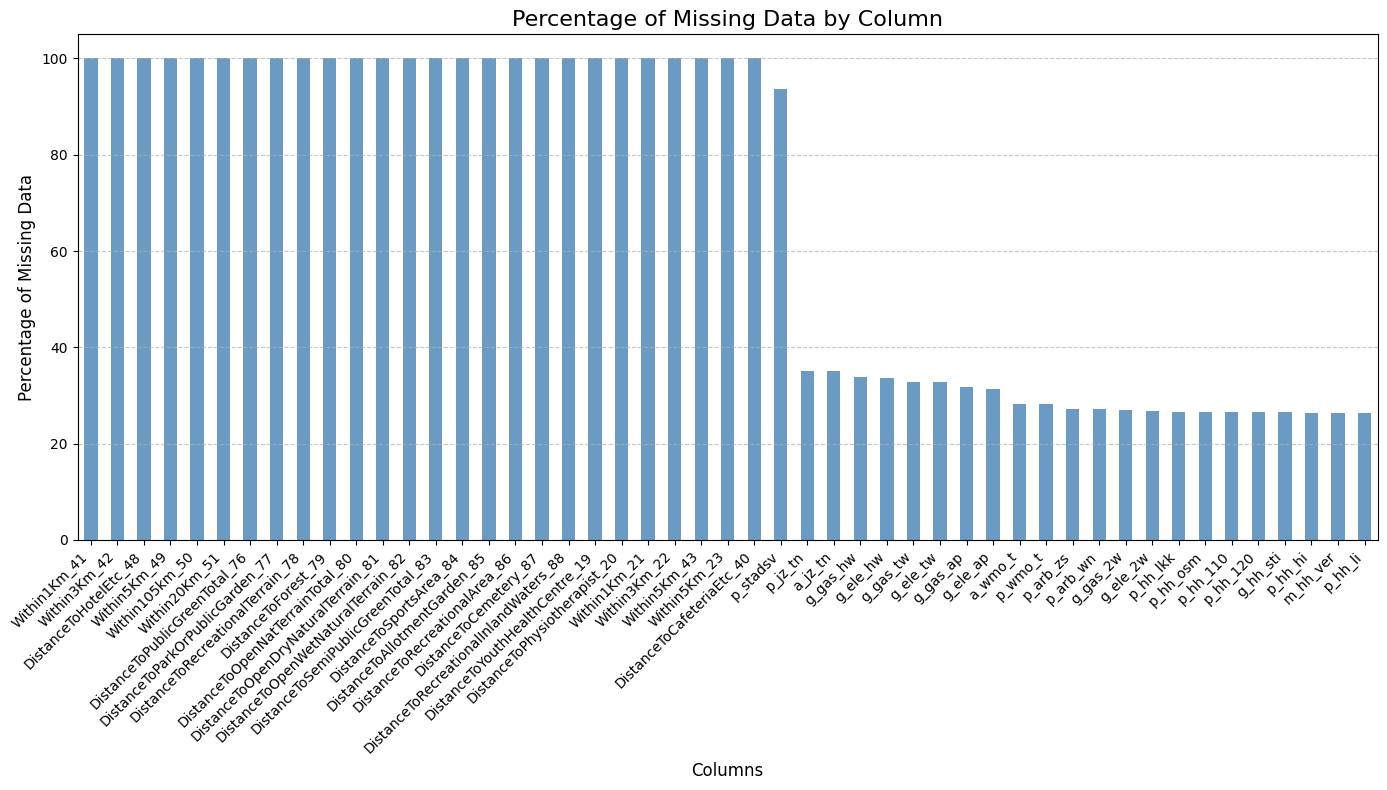

In [136]:
# Calculate the percentage of missing data per column
missing_percentage = df.isnull().mean() * 100

# Filter columns with significant missing data
missing_percentage = missing_percentage[missing_percentage > 25]

# Sort values
missing_percentage = missing_percentage.sort_values(ascending=False)

# Plot with enhancements
plt.figure(figsize=(14, 8))
missing_percentage.plot(kind='bar', color='steelblue', alpha=0.8)

# Add horizontal gridlines for better comparison
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add titles and labels
plt.title('Percentage of Missing Data by Column', fontsize=16)
plt.ylabel('Percentage of Missing Data', fontsize=12)
plt.xlabel('Columns', fontsize=12)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


In [137]:
def clean_missing(df):
    """
    Cleans a DataFrame by:
    1. Removing columns with only missing values or more than 40% missing data.
    2. Removing rows with all missing values.
    3. Outputs relevant information about the cleanup process.
    
    Parameters:
    - df (pd.DataFrame): The DataFrame to clean.

    Returns:
    - pd.DataFrame: The cleaned DataFrame.
    """
    # Step 1: Output the total number of missing values in the dataset
    total_missing = df.isna().sum().sum()
    print(f"Total missing values in the dataset: {total_missing}")
    
    # Step 2: Drop columns with all missing values or more than 40% missing data
    missing_percentage = df.isna().mean() * 100
    cols_to_drop = missing_percentage[missing_percentage > 40].index
    if not cols_to_drop.empty:
        print(f"Columns with more than 40% missing values (or completely missing): {list(cols_to_drop)}")
        df = df.drop(columns=cols_to_drop)
        print(f"Dropped {len(cols_to_drop)} column(s).")
    else:
        print("No columns with more than 40% missing values found.")

    # Step 3: Drop rows with all missing values or more than 40% missing data
    row_missing_percentage = df.isna().mean(axis=1) * 100
    rows_to_drop = row_missing_percentage[row_missing_percentage > 80].index
    if not rows_to_drop.empty:
        print(f"Rows with more than 40% missing values (or completely missing): {len(rows_to_drop)}")
        df = df.drop(index=rows_to_drop)
        print(f"Dropped {len(rows_to_drop)} row(s).")
    else:
        print("No rows with more than 80% missing values found.")

    # Step 4: Return the cleaned DataFrame
    print(f"Cleaned DataFrame shape: {df.shape}")
    display(df.head())
    return df

# Usage Example
df = clean_missing(df)

Total missing values in the dataset: 689984
Columns with more than 40% missing values (or completely missing): ['p_stadsv', 'DistanceToCafeteriaEtc_40', 'Within1Km_41', 'Within3Km_42', 'Within5Km_43', 'DistanceToHotelEtc_48', 'Within5Km_49', 'Within105km_50', 'Within20Km_51', 'DistanceToPublicGreenTotal_76', 'DistanceToParkOrPublicGarden_77', 'DistanceToRecreationalTerrain_78', 'DistanceToForest_79', 'DistanceToOpenNatTerrainTotal_80', 'DistanceToOpenDryNaturalTerrain_81', 'DistanceToOpenWetNaturalTerrain_82', 'DistanceToSemiPublicGreenTotal_83', 'DistanceToSportsArea_84', 'DistanceToAllotmentGarden_85', 'DistanceToRecreationalArea_86', 'DistanceToCemetery_87', 'DistanceToRecreationalInlandWaters_88', 'DistanceToYouthHealthCentre_19', 'DistanceToPhysiotherapist_20', 'Within1Km_21', 'Within3Km_22', 'Within5Km_23']
Dropped 27 column(s).
No rows with more than 80% missing values found.
Cleaned DataFrame shape: (16517, 187)


,DistrictsAndNeighbourhoods,regio,gm_naam,recs,a_inw,a_man,a_vrouw,a_00_14,a_15_24,a_25_44,a_45_64,a_65_oo,a_ongeh,a_gehuwd,a_gesch,a_verwed,a_w_all,a_nw_all,a_marok,a_antaru,a_suri,a_tur,a_ov_nw,a_geb,p_geb,a_ste,p_ste,a_hh,a_1p_hh,a_hh_z_k,a_hh_m_k,g_hhgro,bev_dich,a_woning,g_wozbag,p_1gezw,p_mgezw,p_bewndw,p_leegsw,p_koopw,p_huurw,p_wcorpw,p_ov_hw,p_e_o_w,p_bjj2k,p_bjo2k,g_ele,g_ele_ap,g_ele_tw,g_ele_hw,g_ele_2w,g_ele_vw,g_ele_hu,g_ele_ko,g_gas,g_gas_ap,g_gas_tw,g_gas_hw,g_gas_2w,g_gas_vw,g_gas_hu,g_gas_ko,a_opl_lg,a_opl_md,a_opl_hg,p_arb_pp,p_arb_wn,p_arb_zs,a_inkont,g_ink_po,g_ink_pi,p_ink_li,p_ink_hi,g_hh_sti,p_hh_li,p_hh_hi,p_hh_lkk,p_hh_osm,p_hh_110,p_hh_120,m_hh_ver,a_soz_wb,a_soz_ao,a_soz_ww,a_soz_ow,a_jz_tn,p_jz_tn,a_wmo_t,p_wmo_t,a_bedv,a_bed_a,a_bed_bf,a_bed_gi,a_bed_hj,a_bed_kl,a_bed_mn,a_bed_oq,a_bed_ru,a_pau,a_bst_b,a_bst_nb,g_pau_hh,g_pau_km,a_m2w,a_opp_ha,a_lan_ha,a_wat_ha,pst_mvp,pst_dekp,ste_mvs,ste_oad,DistanceToLargeSupermarket_24,Within1Km_25,Within3Km_26,Within5Km_27,DistanceToShopForOtherDailyFood_28,DistanceToDepartmentStore_32,Within5Km_33,Within10Km_34,Within20Km_35,DistanceToCafeEtc_36,Within1Km_37,Within3Km_38,Within5Km_39,Within1Km_45,Within3Km_46,Within5Km_47,DistanceToDaycareCentres_52,Within1Km_53,Within3Km_54,Within5Km_55,DistanceToOutOfSchoolCare_56,Within1Km_57,Within3Km_58,Within5Km_59,DistanceToSchool_60,Within1Km_61,Within3Km_62,Within5Km_63,DistanceToSchool_64,Within3Km_65,Within5Km_66,Within10Km_67,DistanceToSchool_68,Within3Km_69,Within5Km_70,Within10Km_71,DistanceToSchool_72,Within3Km_73,Within5Km_74,Within10Km_75,DistanceToMainRoadEntrance_89,DistanceToTrainStationAllTypes_90,DistanceToImportantTransferStation_91,DistanceToLibrary_92,DistanceToSwimmingPool_93,DistanceToArtificialIceSkatingRink_94,DistanceToMuseum_95,Within5Km_96,Within10Km_97,Within20Km_98,DistanceToPerformingArts_99,Within5Km_100,Within10Km_101,Within20Km_102,DistanceToPopMusicVenue_103,DistanceToCinema_104,Within5Km_105,Within10Km_106,Within20Km_107,DistanceToSauna_108,DistanceToTanningSalon_109,DistanceToAttraction_110,Within10Km_111,Within20Km_112,Within50Km_113,DistanceToFireStation_114,DistanceToGPPractice_5,Within1Km_6,Within3Km_7,Within5Km_8,DistanceToGPPost_9,DistanceToPharmacy_10,DistanceToHospital_11,Within5Km_12,Within10Km_13,Within20Km_14
0,NL00,Nederland,Nederland,Land,17475415,8686536,8788879,2711731,2139221,4347005,4819923,3457535,8558739,6678969,1377923,859784,1858730,2447178,414186,171413,358266,422030,1081283,179441,10,170972,10,8043443,3097117,2331454,2614872,2.10,519.00,7966331,290.00,64.00,36.00,96.00,4.00,57.00,43.00,29.00,14.00,0.00,82.00,18.00,2810.00,2040.00,2870.00,3000.00,3370.00,4190.00,2140.00,3300.00,1250.00,840.00,1180.00,1400.00,1650.00,2150.00,970.00,1470.00,3565510.00,5520240.00,4215660.00,69.00,83.00,17.00,13960800,35.70,29.10,40.00,20.00,33.60,40.00,20.00,6.30,6.50,9.80,12.40,88.40,407970.00,747060.00,166620.00,3233130.00,463600.00,10.50,NaN,NaN,2104540,77875.00,289660.00,364075.00,156870.00,168595.00,478950.00,332725.00,235795.00,8686420,6980745,1705675,1.10,258.00,666595,4154338,3367109,787228,NaN,NaN,2.00,2024.00,1.00,1.80,11.00,23.80,0.80,2.70,2.40,6.70,19.70,1.40,2.80,22.90,49.60,8.00,66.00,145.30,0.70,2.80,19.10,43.50,0.80,2.20,14.20,32.60,0.80,1.70,9.90,22.00,2.50,3.60,7.80,20.00,2.60,2.80,6.00,15.50,3.40,2.00,4.30,10.90,1.90,5.30,10.80,2.00,3.40,19.50,4.30,3.30,8.10,21.30,4.90,2.90,6.90,16.20,10.20,6.50,1.30,2.90,7.30,8.40,4.20,5.60,3.00,8.80,41.00,2.20,1.10,1.20,7.70,16.80,6.90,1.30,4.90,1.10,2.90,8.60
1,GM0014,Groningen,Groningen,Gemeente,233273,116177,117096,28437,49538,69799,50403,35096,153241,55478,16374,8180,29771,28507,1278,4077,3367,1771,18014,2233,10,1846,8,136508,80059,30882,25567,1.70,1257.00,118922,225.00,40.00,60.00,96.00,4.00,40.00,59.00,33.00,27.00,0.00,83.00,17.00,2250.00,1830.00,2570.00,2740.00,3170.00,3960.00,1910.00,2740.00,1190.00,950.00,1320.00,1510.00,1690.00,2290.00,1000.00,1460.00,31590.00,74950.00,84970.00,65.00,87.00,13.00,187900,31.90,26.80,46.0

In [138]:
# Empty values
cleaned_df_missing = df.isnull().sum()
print(f"In the dataProx dataset there are {cleaned_df_missing.sum()} missing values")

In the dataProx dataset there are 245080 missing values


<h3>2.0: Data exploration</h3>

<h4>2.1: Exploratory analysis</h4>

In [141]:
df.info()
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16517 entries, 0 to 16516
Columns: 187 entries, DistrictsAndNeighbourhoods to Within20Km_14
dtypes: float64(146), int64(37), string(4)
memory usage: 23.6 MB


,DistrictsAndNeighbourhoods,regio,gm_naam,recs,a_inw,a_man,a_vrouw,a_00_14,a_15_24,a_25_44,a_45_64,a_65_oo,a_ongeh,a_gehuwd,a_gesch,a_verwed,a_w_all,a_nw_all,a_marok,a_antaru,a_suri,a_tur,a_ov_nw,a_geb,p_geb,a_ste,p_ste,a_hh,a_1p_hh,a_hh_z_k,a_hh_m_k,g_hhgro,bev_dich,a_woning,g_wozbag,p_1gezw,p_mgezw,p_bewndw,p_leegsw,p_koopw,p_huurw,p_wcorpw,p_ov_hw,p_e_o_w,p_bjj2k,p_bjo2k,g_ele,g_ele_ap,g_ele_tw,g_ele_hw,g_ele_2w,g_ele_vw,g_ele_hu,g_ele_ko,g_gas,g_gas_ap,g_gas_tw,g_gas_hw,g_gas_2w,g_gas_vw,g_gas_hu,g_gas_ko,a_opl_lg,a_opl_md,a_opl_hg,p_arb_pp,p_arb_wn,p_arb_zs,a_inkont,g_ink_po,g_ink_pi,p_ink_li,p_ink_hi,g_hh_sti,p_hh_li,p_hh_hi,p_hh_lkk,p_hh_osm,p_hh_110,p_hh_120,m_hh_ver,a_soz_wb,a_soz_ao,a_soz_ww,a_soz_ow,a_jz_tn,p_jz_tn,a_wmo_t,p_wmo_t,a_bedv,a_bed_a,a_bed_bf,a_bed_gi,a_bed_hj,a_bed_kl,a_bed_mn,a_bed_oq,a_bed_ru,a_pau,a_bst_b,a_bst_nb,g_pau_hh,g_pau_km,a_m2w,a_opp_ha,a_lan_ha,a_wat_ha,pst_mvp,pst_dekp,ste_mvs,ste_oad,DistanceToLargeSupermarket_24,Within1Km_25,Within3Km_26,Within5Km_27,DistanceToShopForOtherDailyFood_28,DistanceToDepartmentStore_32,Within5Km_33,Within10Km_34,Within20Km_35,DistanceToCafeEtc_36,Within1Km_37,Within3Km_38,Within5Km_39,Within1Km_45,Within3Km_46,Within5Km_47,DistanceToDaycareCentres_52,Within1Km_53,Within3Km_54,Within5Km_55,DistanceToOutOfSchoolCare_56,Within1Km_57,Within3Km_58,Within5Km_59,DistanceToSchool_60,Within1Km_61,Within3Km_62,Within5Km_63,DistanceToSchool_64,Within3Km_65,Within5Km_66,Within10Km_67,DistanceToSchool_68,Within3Km_69,Within5Km_70,Within10Km_71,DistanceToSchool_72,Within3Km_73,Within5Km_74,Within10Km_75,DistanceToMainRoadEntrance_89,DistanceToTrainStationAllTypes_90,DistanceToImportantTransferStation_91,DistanceToLibrary_92,DistanceToSwimmingPool_93,DistanceToArtificialIceSkatingRink_94,DistanceToMuseum_95,Within5Km_96,Within10Km_97,Within20Km_98,DistanceToPerformingArts_99,Within5Km_100,Within10Km_101,Within20Km_102,DistanceToPopMusicVenue_103,DistanceToCinema_104,Within5Km_105,Within10Km_106,Within20Km_107,DistanceToSauna_108,DistanceToTanningSalon_109,DistanceToAttraction_110,Within10Km_111,Within20Km_112,Within50Km_113,DistanceToFireStation_114,DistanceToGPPractice_5,Within1Km_6,Within3Km_7,Within5Km_8,DistanceToGPPost_9,DistanceToPharmacy_10,DistanceToHospital_11,Within5Km_12,Within10Km_13,Within20Km_14
0,NL00,Nederland,Nederland,Land,17475415,8686536,8788879,2711731,2139221,4347005,4819923,3457535,8558739,6678969,1377923,859784,1858730,2447178,414186,171413,358266,422030,1081283,179441,10,170972,10,8043443,3097117,2331454,2614872,2.10,519.00,7966331,290.00,64.00,36.00,96.00,4.00,57.00,43.00,29.00,14.00,0.00,82.00,18.00,2810.00,2040.00,2870.00,3000.00,3370.00,4190.00,2140.00,3300.00,1250.00,840.00,1180.00,1400.00,1650.00,2150.00,970.00,1470.00,3565510.00,5520240.00,4215660.00,69.00,83.00,17.00,13960800,35.70,29.10,40.00,20.00,33.60,40.00,20.00,6.30,6.50,9.80,12.40,88.40,407970.00,747060.00,166620.00,3233130.00,463600.00,10.50,NaN,NaN,2104540,77875.00,289660.00,364075.00,156870.00,168595.00,478950.00,332725.00,235795.00,8686420,6980745,1705675,1.10,258.00,666595,4154338,3367109,787228,NaN,NaN,2.00,2024.00,1.00,1.80,11.00,23.80,0.80,2.70,2.40,6.70,19.70,1.40,2.80,22.90,49.60,8.00,66.00,145.30,0.70,2.80,19.10,43.50,0.80,2.20,14.20,32.60,0.80,1.70,9.90,22.00,2.50,3.60,7.80,20.00,2.60,2.80,6.00,15.50,3.40,2.00,4.30,10.90,1.90,5.30,10.80,2.00,3.40,19.50,4.30,3.30,8.10,21.30,4.90,2.90,6.90,16.20,10.20,6.50,1.30,2.90,7.30,8.40,4.20,5.60,3.00,8.80,41.00,2.20,1.10,1.20,7.70,16.80,6.90,1.30,4.90,1.10,2.90,8.60
1,GM0014,Groningen,Groningen,Gemeente,233273,116177,117096,28437,49538,69799,50403,35096,153241,55478,16374,8180,29771,28507,1278,4077,3367,1771,18014,2233,10,1846,8,136508,80059,30882,25567,1.70,1257.00,118922,225.00,40.00,60.00,96.00,4.00,40.00,59.00,33.00,27.00,0.00,83.00,17.00,2250.00,1830.00,2570.00,2740.00,3170.00,3960.00,1910.00,2740.00,1190.00,950.00,1320.00,1510.00,1690.00,2290.00,1000.00,1460.00,31590.00,74950.00,84970.00,65.00,87.00,13.00,187900,31.90,26.80,46.0

In [142]:
# Summary statistics for numerical variables
pd.set_option('display.float_format', '{:.2f}'.format)
summary_stats = df.describe()
display(summary_stats)

,a_inw,a_man,a_vrouw,a_00_14,a_15_24,a_25_44,a_45_64,a_65_oo,a_ongeh,a_gehuwd,a_gesch,a_verwed,a_w_all,a_nw_all,a_marok,a_antaru,a_suri,a_tur,a_ov_nw,a_geb,p_geb,a_ste,p_ste,a_hh,a_1p_hh,a_hh_z_k,a_hh_m_k,g_hhgro,bev_dich,a_woning,g_wozbag,p_1gezw,p_mgezw,p_bewndw,p_leegsw,p_koopw,p_huurw,p_wcorpw,p_ov_hw,p_e_o_w,p_bjj2k,p_bjo2k,g_ele,g_ele_ap,g_ele_tw,g_ele_hw,g_ele_2w,g_ele_vw,g_ele_hu,g_ele_ko,g_gas,g_gas_ap,g_gas_tw,g_gas_hw,g_gas_2w,g_gas_vw,g_gas_hu,g_gas_ko,a_opl_lg,a_opl_md,a_opl_hg,p_arb_pp,p_arb_wn,p_arb_zs,a_inkont,g_ink_po,g_ink_pi,p_ink_li,p_ink_hi,g_hh_sti,p_hh_li,p_hh_hi,p_hh_lkk,p_hh_osm,p_hh_110,p_hh_120,m_hh_ver,a_soz_wb,a_soz_ao,a_soz_ww,a_soz_ow,a_jz_tn,p_jz_tn,a_wmo_t,p_wmo_t,a_bedv,a_bed_a,a_bed_bf,a_bed_gi,a_bed_hj,a_bed_kl,a_bed_mn,a_bed_oq,a_bed_ru,a_pau,a_bst_b,a_bst_nb,g_pau_hh,g_pau_km,a_m2w,a_opp_ha,a_lan_ha,a_wat_ha,pst_mvp,pst_dekp,ste_mvs,ste_oad,DistanceToLargeSupermarket_24,Within1Km_25,Within3Km_26,Within5Km_27,DistanceToShopForOtherDailyFood_28,DistanceToDepartmentStore_32,Within5Km_33,Within10Km_34,Within20Km_35,DistanceToCafeEtc_36,Within1Km_37,Within3Km_38,Within5Km_39,Within1Km_45,Within3Km_46,Within5Km_47,DistanceToDaycareCentres_52,Within1Km_53,Within3Km_54,Within5Km_55,DistanceToOutOfSchoolCare_56,Within1Km_57,Within3Km_58,Within5Km_59,DistanceToSchool_60,Within1Km_61,Within3Km_62,Within5Km_63,DistanceToSchool_64,Within3Km_65,Within5Km_66,Within10Km_67,DistanceToSchool_68,Within3Km_69,Within5Km_70,Within10Km_71,DistanceToSchool_72,Within3Km_73,Within5Km_74,Within10Km_75,DistanceToMainRoadEntrance_89,DistanceToTrainStationAllTypes_90,DistanceToImportantTransferStation_91,DistanceToLibrary_92,DistanceToSwimmingPool_93,DistanceToArtificialIceSkatingRink_94,DistanceToMuseum_95,Within5Km_96,Within10Km_97,Within20Km_98,DistanceToPerformingArts_99,Within5Km_100,Within10Km_101,Within20Km_102,DistanceToPopMusicVenue_103,DistanceToCinema_104,Within5Km_105,Within10Km_106,Within20Km_107,DistanceToSauna_108,DistanceToTanningSalon_109,DistanceToAttraction_110,Within10Km_111,Within20Km_112,Within50Km_113,DistanceToFireStation_114,DistanceToGPPractice_5,Within1Km_6,Within3Km_7,Within5Km_8,DistanceToGPPost_9,DistanceToPharmacy_10,DistanceToHospital_11,Within5Km_12,Within10Km_13,Within20Km_14
count,16517.00,16517.00,16517.00,16517.00,16517.00,16517.00,16517.00,16517.00,16517.00,16517.00,16517.00,16517.00,16517.00,16517.00,16517.00,16517.00,16517.00,16517.00,16517.00,16517.00,16517.00,16517.00,16517.00,16517.00,16517.00,16517.00,16517.00,16175.00,15862.00,16517.00,14818.00,14987.00,14987.00,14987.00,14987.00,14986.00,14986.00,14986.00,14986.00,14986.00,14987.00,14987.00,15666.00,11356.00,11104.00,10953.00,12096.00,13808.00,13953.00,15426.00,15629.00,11286.00,11082.00,10923.00,12068.00,13788.00,13918.00,15388.00,14510.00,14516.00,14512.00,12773.00,12008.00,12008.00,16517.00,13673.00,14015.00,13686.00,13686.00,12139.00,12174.00,12174.00,12113.00,12113.00,12113.00,12113.00,12174.00,15036.00,15036.00,15036.00,15036.00,10727.00,10724.00,11850.00,11850.00,16517.00,14456.00,14456.00,14456.00,14456.00,14456.00,14456.00,14456.00,14456.00,16517.00,16517.00,16517.00,13502.00,13502.00,16517.00,16517.00,16517.00,16517.00,13051.00,13051.00,16449.00,16449.00,15879.00,15879.00,15879.00,15879.00,15879.00,15879.00,15879.00,15879.00,15879.00,15879.00,15879.00,15879.00,15879.00,15879.00,15879.00,15879.00,15879.00,15879.00,15879.00,15879.00,15879.00,15879.00,15879.00,15879.00,15879.00,15879.00,15879.00,15879.00,15879.00,15879.00,15879.00,15879.00,15879.00,15879.00,15879.00,15879.00,15879.00,15879.00,15879.00,15879.00,15879.00,15879.00,15879.00,15879.00,15879.00,15879.00,15879.00,15879.00,15879.00,15879.00,15879.00,15879.00,15879.00,15879.00,15879.00,15879.00,15879.00,15879.00,15879.00,15879.00,15879.00,15879.00,15879.00,15879.00,15879.00,15879.00,15879.00,15879.00,15879.00,15879.00,15879.00,15879.00,15879.00,15879.00,15879.00,15879.00
mean,4038.20,2007.21,2031.03,627.55,494.60,993.93,1116.52,805.55,1963.76,1555.31,318.02,20

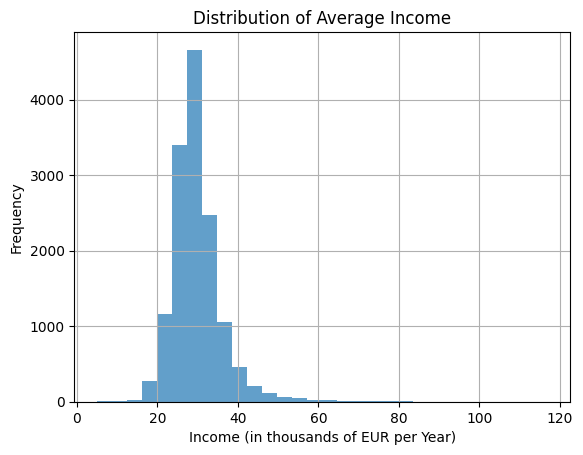

In [143]:
# Distribution of the target variable
df['g_ink_pi'].hist(bins=30, alpha=0.7)
plt.title('Distribution of Average Income')
plt.xlabel('Income (in thousands of EUR per Year)')
plt.ylabel('Frequency')
plt.show()

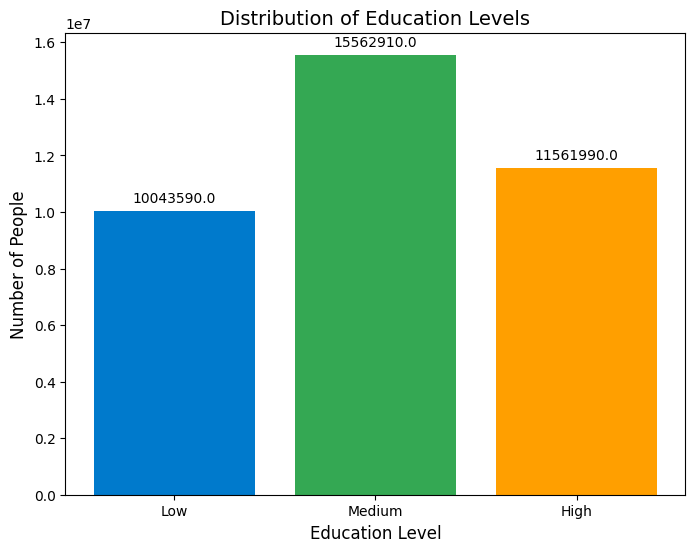

In [144]:
a_opl_lg = df['a_opl_lg'].iloc[1:].sum()
a_opl_md = df['a_opl_md'].iloc[1:].sum()
a_opl_hg = df['a_opl_hg'].iloc[1:].sum()

# Data preparation for the bar chart
education_levels = ['Low', 'Medium', 'High']
counts = [a_opl_lg, a_opl_md, a_opl_hg]

# Create the bar chart
plt.figure(figsize=(8, 6))
plt.bar(education_levels, counts, color=['#007acc', '#34a853', '#ff9f00'])

# Add labels and title
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Number of People', fontsize=12)
plt.title('Distribution of Education Levels', fontsize=14)

# Show values on top of bars
for i, count in enumerate(counts):
    plt.text(i, count + max(counts) * 0.02, str(count), ha='center', fontsize=10)

# Display the chart
plt.show()

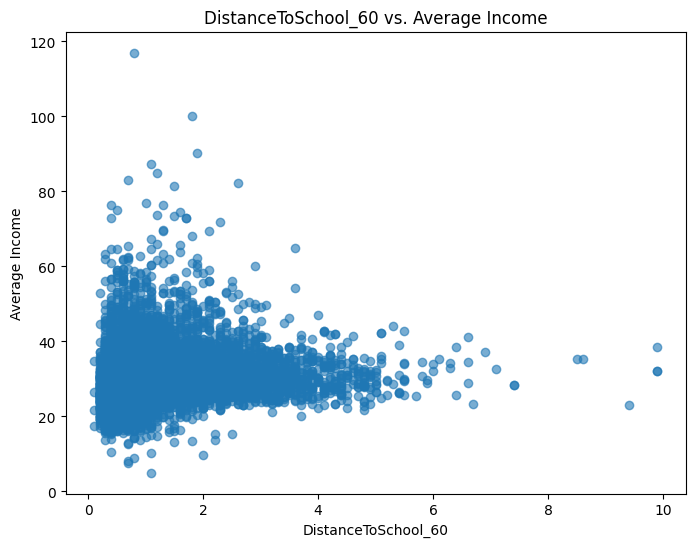

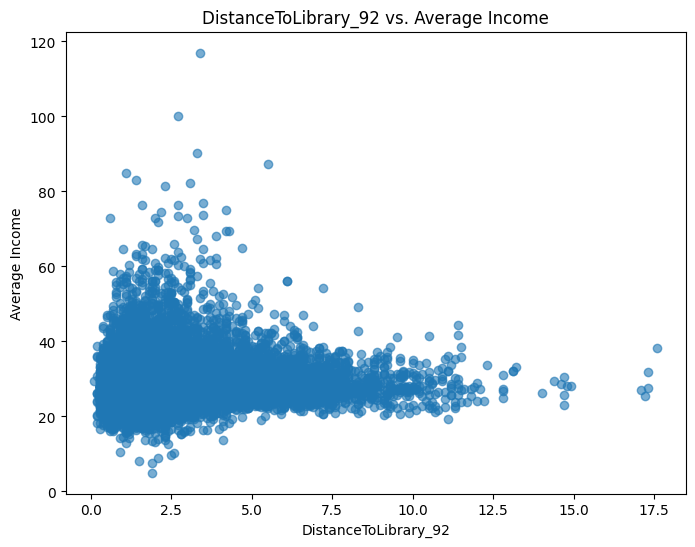

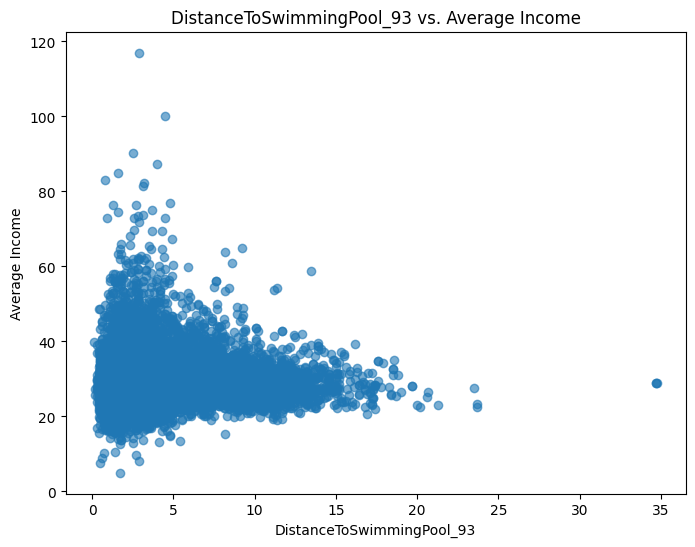

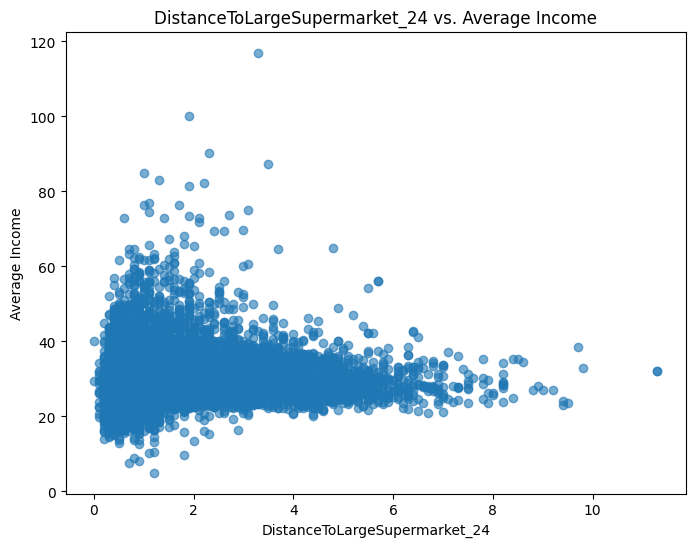

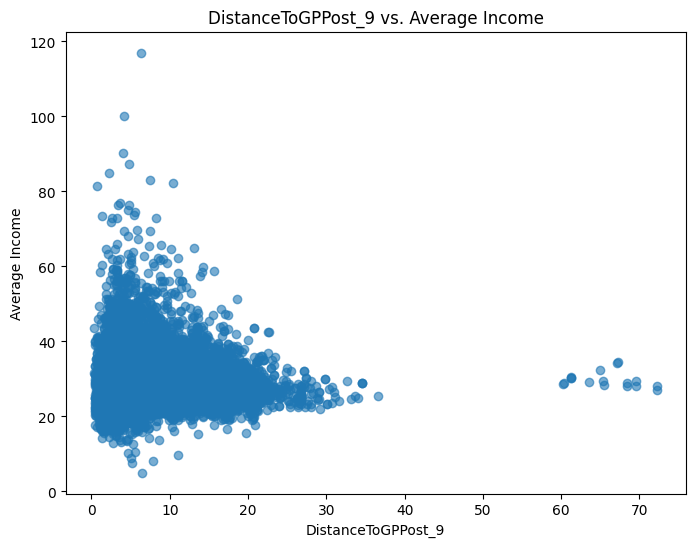

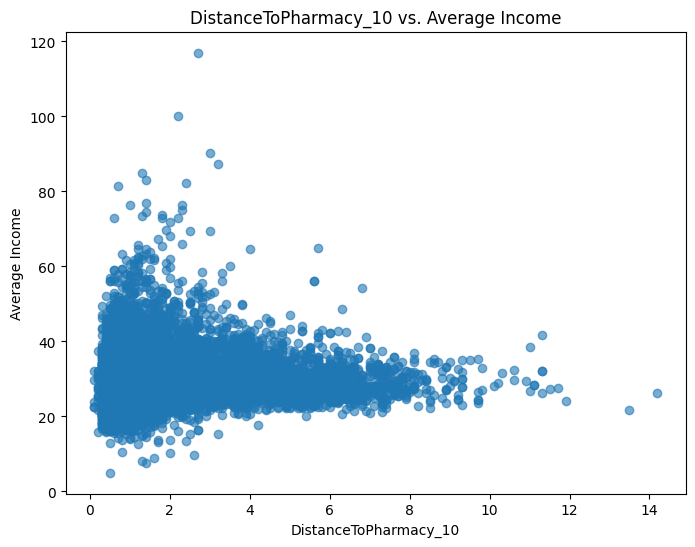

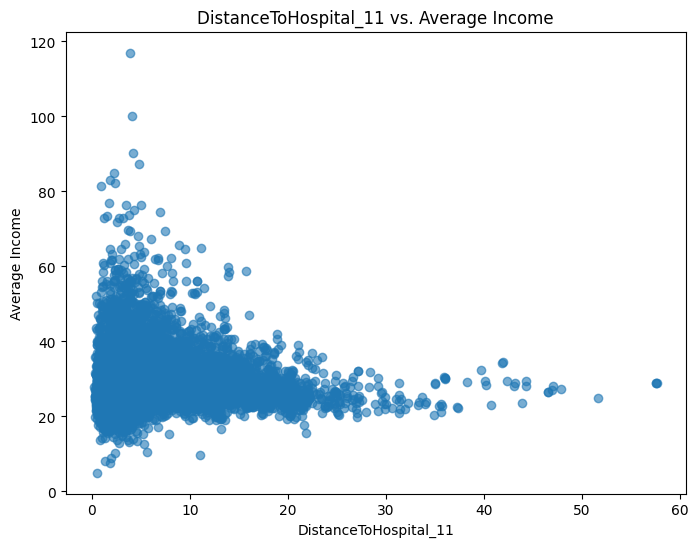

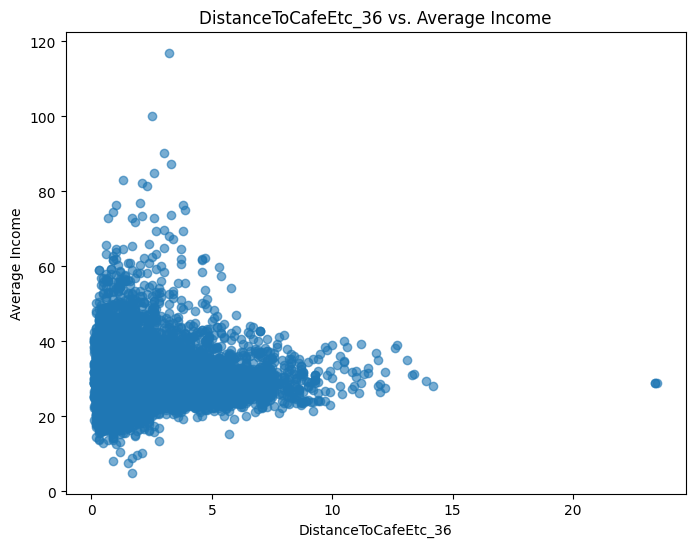

In [145]:
# List of variables to compare the target variable
variables_to_compare = ['DistanceToSchool_60', 'DistanceToLibrary_92', 'DistanceToSwimmingPool_93', 
                        'DistanceToLargeSupermarket_24', 'DistanceToGPPost_9', 'DistanceToPharmacy_10','DistanceToHospital_11', 'DistanceToCafeEtc_36']

# Target variable
target_variable = 'g_ink_pi'
target_label = 'Average Income'

# Loop through each variable and create scatter plots
for variable in variables_to_compare:
    plt.figure(figsize=(8, 6))
    plt.scatter(df[variable], df[target_variable], alpha=0.6)
    plt.title(f'{variable} vs. {target_label}')
    plt.xlabel(variable)
    plt.ylabel(target_label)
    plt.show()


<h6>Interpretting the plots:</h6>

<p>The plots suggest a weak or no significant relationship between proximity to public amenities and average income. Most people live close to these amenities, and income appears influenced by other factors like education or employment.</p>

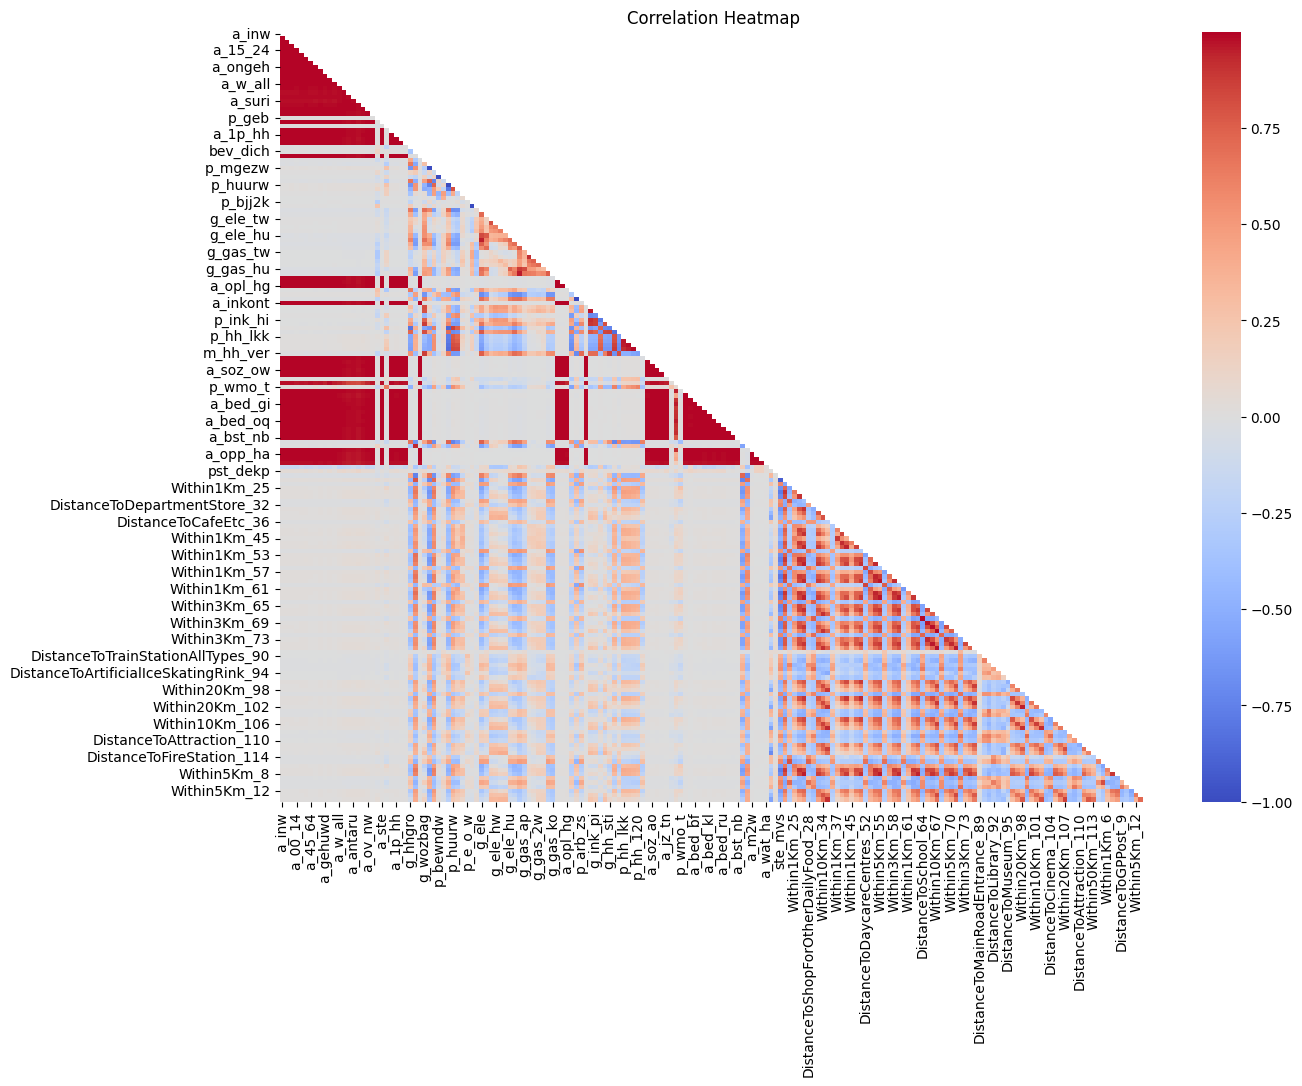

In [148]:
# Visualize correlations
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df[num_cols].corr()

# Mask the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Visualize correlations
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, fmt='.2f', mask=mask, cbar=True)
plt.title("Correlation Heatmap")
plt.show()

<p>The heatmap reveals complex correlations between demographic and location-based variables, suggesting that feature engineering, feature selection and dimensionality reduction techniques will be crucial for model development. Given these patterns, multiple data cleaning approaches could be considered - including removing highly correlated features (using absolute correlation thresholds), eliminating low-variance variables, or applying PCA to reduce dimensionality while preserving the most important patterns in the data - with the choice depending on the specific modeling objectives and the need to maintain interpretability.</p>

<h2>3.0: Feature engeneering and reducing dimensionlity</h2>

<h3>3.1: Feature engineering</h3>

In [151]:
#Demograpics features
# Men to women ratio
df["r_man_to_women"] = df["a_man"] / df["a_vrouw"]
df.drop(columns = ["a_man","a_vrouw"], inplace=True)

# Age of population proportion
df["p_young_pop"] = (df["a_00_14"] + df["a_15_24"])/ df["a_inw"] # Young
df.drop(columns = ["a_00_14","a_15_24"], inplace=True)

df["p_middle_pop"] = (df["a_25_44"] + df["a_45_64"])/ df["a_inw"] # Middle
df.drop(columns = ["a_25_44","a_45_64"], inplace=True)

df["p_old_pop"] = df["a_65_oo"] / df["a_inw"] # Old
df.drop(columns = ["a_65_oo"], inplace=True)

# Ethnicity share: Western
df["s_western"] = df["a_w_all"] / df["a_inw"]

# Ethnicity share: Non-Western
df["s_nonwestern"]= df["a_nw_all"] / df["a_inw"]

df.drop(columns = ["a_w_all","a_nw_all", "a_marok","a_antaru", "a_suri","a_tur","a_ov_nw"], inplace=True)

# Drop relative birth and death columns
df.drop(columns = ["p_geb", "p_ste"], inplace=True)

# Drop income columns except from the target variable `g_ink_pi`
df.drop(columns = ["a_inkont","g_ink_po","p_ink_li","p_ink_hi","g_hh_sti","p_hh_li","p_hh_hi","p_hh_lkk","p_hh_osm","p_hh_110","p_hh_120"], inplace=True)

# Drop rows where the target variable is missing
df = df.dropna(subset=["g_ink_pi"])

# Proximity features
# Weighted aggragated proximity score: shopping food
df["super_access_score"] = 0.5 * df["Within1Km_25"] + 0.3 * df["Within3Km_26"] + 0.2 * df["Within5Km_27"]
df.drop(columns = ["Within1Km_25","Within3Km_26","Within5Km_27"], inplace=True)

# Weighted aggragated proximity score: shopping department
df["department_access_score"] = 0.5 * df["Within5Km_33"] + 0.3 * df["Within10Km_34"] + 0.2 * df["Within20Km_35"]
df.drop(columns = ["Within5Km_33","Within10Km_34","Within20Km_35"], inplace=True)

# Weighted aggragated proximity score: leisure cafe
df["cafe_access_score"] = 0.5 * df["Within1Km_37"] + 0.3 * df["Within3Km_38"] + 0.2 * df["Within5Km_39"]
df.drop(columns = ["Within1Km_37","Within3Km_38","Within5Km_39"], inplace=True)

# Weighted aggragated proximity score: daycare
df["daycare_access_score"] = 0.5 * df["Within1Km_53"] + 0.3 * df["Within3Km_54"] + 0.2 * df["Within5Km_55"]
df.drop(columns = ["Within1Km_53","Within3Km_54","Within5Km_55"], inplace=True)

# Weighted aggragated proximity score: out of school care
df["outschoolcare_access_score"] = 0.5 * df["Within1Km_57"] + 0.3 * df["Within3Km_58"] + 0.2 * df["Within5Km_59"]
df.drop(columns = ["Within1Km_57","Within3Km_58","Within5Km_59"], inplace=True)

# Weighted aggragated proximity score: hospital
df["hospital_access_score"] = 0.5 * df["Within5Km_12"] + 0.3 * df["Within10Km_13"] + 0.2 * df["Within20Km_14"]
df.drop(columns = ["Within5Km_12","Within10Km_13","Within20Km_14"], inplace=True)

# Weighted aggragated proximity score: GPpractice
df["gp_access_score"] = 0.5 * df["Within1Km_6"] + 0.3 * df["Within3Km_7"] + 0.2 * df["Within5Km_8"]
df.drop(columns = ["Within1Km_6","Within3Km_7","Within5Km_8"], inplace=True)

# Weighted aggragated proximity score: attraction
df["attraction_access_score"] = 0.5 * df["Within10Km_111"] + 0.3 * df["Within20Km_112"] + 0.2 * df["Within50Km_113"]
df.drop(columns = ["Within10Km_111","Within20Km_112","Within50Km_113"], inplace=True)

# Weighted aggragated proximity score: cinema
df["cinema_access_score"] = 0.5 * df["Within5Km_105"] + 0.3 * df["Within10Km_106"] + 0.2 * df["Within20Km_107"]
df.drop(columns = ["Within5Km_105","Within10Km_106","Within20Km_107"], inplace=True)

# Weighted aggragated proximity score: performing arts
df["perform_art_access_score"] = 0.5 * df["Within5Km_100"] + 0.3 * df["Within10Km_101"] + 0.2 * df["Within20Km_102"]
df.drop(columns = ["Within5Km_100","Within10Km_101","Within20Km_102"], inplace=True)

# Weighted aggragated proximity score: museum
df["museum_access_score"] = 0.5 * df["Within5Km_96"] + 0.3 * df["Within10Km_97"] + 0.2 * df["Within20Km_98"]
df.drop(columns = ["Within5Km_96","Within10Km_97","Within20Km_98"], inplace=True)

# Drop random columns
df.drop(columns = ["Within1Km_45","Within3Km_46","Within5Km_47"], inplace=True)

# Weighted aggragated proximity score: elementary
df["elementary_access_score"] = 0.5 * df["Within1Km_61"] + 0.3 * df["Within3Km_62"] + 0.2 * df["Within5Km_63"]
df.drop(columns = ["Within1Km_61","Within3Km_62","Within5Km_63"], inplace=True)

# Weighted aggragated proximity score: middle school
df["middle_access_score"] = 0.5 * df["Within3Km_65"] + 0.3 * df["Within5Km_66"] + 0.2 * df["Within10Km_67"]
df.drop(columns = ["Within3Km_65","Within5Km_66","Within10Km_67"], inplace=True)

# Weighted aggragated proximity score: college
df["college_access_score"] = 0.5 * df["Within3Km_69"] + 0.3 * df["Within5Km_70"] + 0.2 * df["Within10Km_71"]
df.drop(columns = ["Within3Km_69","Within5Km_70","Within10Km_71"], inplace=True)

# Weighted aggragated proximity score: university
df["college_access_score"] = 0.5 * df["Within3Km_73"] + 0.3 * df["Within5Km_74"] + 0.2 * df["Within10Km_75"]
df.drop(columns = ["Within3Km_73","Within5Km_74","Within10Km_75"], inplace=True)

# Output the changed df
print(df.shape)
display(df.head())

(14015, 132)


,DistrictsAndNeighbourhoods,regio,gm_naam,recs,a_inw,a_ongeh,a_gehuwd,a_gesch,a_verwed,a_geb,a_ste,a_hh,a_1p_hh,a_hh_z_k,a_hh_m_k,g_hhgro,bev_dich,a_woning,g_wozbag,p_1gezw,p_mgezw,p_bewndw,p_leegsw,p_koopw,p_huurw,p_wcorpw,p_ov_hw,p_e_o_w,p_bjj2k,p_bjo2k,g_ele,g_ele_ap,g_ele_tw,g_ele_hw,g_ele_2w,g_ele_vw,g_ele_hu,g_ele_ko,g_gas,g_gas_ap,g_gas_tw,g_gas_hw,g_gas_2w,g_gas_vw,g_gas_hu,g_gas_ko,a_opl_lg,a_opl_md,a_opl_hg,p_arb_pp,p_arb_wn,p_arb_zs,g_ink_pi,m_hh_ver,a_soz_wb,a_soz_ao,a_soz_ww,a_soz_ow,a_jz_tn,p_jz_tn,a_wmo_t,p_wmo_t,a_bedv,a_bed_a,a_bed_bf,a_bed_gi,a_bed_hj,a_bed_kl,a_bed_mn,a_bed_oq,a_bed_ru,a_pau,a_bst_b,a_bst_nb,g_pau_hh,g_pau_km,a_m2w,a_opp_ha,a_lan_ha,a_wat_ha,pst_mvp,pst_dekp,ste_mvs,ste_oad,DistanceToLargeSupermarket_24,DistanceToShopForOtherDailyFood_28,DistanceToDepartmentStore_32,DistanceToCafeEtc_36,DistanceToDaycareCentres_52,DistanceToOutOfSchoolCare_56,DistanceToSchool_60,DistanceToSchool_64,DistanceToSchool_68,DistanceToSchool_72,DistanceToMainRoadEntrance_89,DistanceToTrainStationAllTypes_90,DistanceToImportantTransferStation_91,DistanceToLibrary_92,DistanceToSwimmingPool_93,DistanceToArtificialIceSkatingRink_94,DistanceToMuseum_95,DistanceToPerformingArts_99,DistanceToPopMusicVenue_103,DistanceToCinema_104,DistanceToSauna_108,DistanceToTanningSalon_109,DistanceToAttraction_110,DistanceToFireStation_114,DistanceToGPPractice_5,DistanceToGPPost_9,DistanceToPharmacy_10,DistanceToHospital_11,r_man_to_women,p_young_pop,p_middle_pop,p_old_pop,s_western,s_nonwestern,super_access_score,department_access_score,cafe_access_score,daycare_access_score,outschoolcare_access_score,hospital_access_score,gp_access_score,attraction_access_score,cinema_access_score,perform_art_access_score,museum_access_score,elementary_access_score,middle_access_score,college_access_score
0,NL00,Nederland,Nederland,Land,17475415,8558739,6678969,1377923,859784,179441,170972,8043443,3097117,2331454,2614872,2.10,519.00,7966331,290.00,64.00,36.00,96.00,4.00,57.00,43.00,29.00,14.00,0.00,82.00,18.00,2810.00,2040.00,2870.00,3000.00,3370.00,4190.00,2140.00,3300.00,1250.00,840.00,1180.00,1400.00,1650.00,2150.00,970.00,1470.00,3565510.00,5520240.00,4215660.00,69.00,83.00,17.00,29.10,88.40,407970.00,747060.00,166620.00,3233130.00,463600.00,10.50,NaN,NaN,2104540,77875.00,289660.00,364075.00,156870.00,168595.00,478950.00,332725.00,235795.00,8686420,6980745,1705675,1.10,258.00,666595,4154338,3367109,787228,NaN,NaN,2.00,2024.00,1.00,0.80,2.70,1.40,0.70,0.80,0.80,2.50,2.60,3.40,1.90,5.30,10.80,2.00,3.40,19.50,4.30,4.90,10.20,6.50,8.40,4.20,5.60,2.20,1.10,6.90,1.30,4.90,0.99,0.28,0.52,0.20,0.11,0.14,8.96,7.15,18.19,15.83,11.88,3.14,6.27,12.34,2.98,6.76,8.34,8.22,8.14,4.47
1,GM0014,Groningen,Groningen,Gemeente,233273,153241,55478,16374,8180,2233,1846,136508,80059,30882,25567,1.70,1257.00,118922,225.00,40.00,60.00,96.00,4.00,40.00,59.00,33.00,27.00,0.00,83.00,17.00,2250.00,1830.00,2570.00,2740.00,3170.00,3960.00,1910.00,2740.00,1190.00,950.00,1320.00,1510.00,1690.00,2290.00,1000.00,1460.00,31590.00,74950.00,84970.00,65.00,87.00,13.00,26.80,11.00,10100.00,8890.00,2100.00,32730.00,5465.00,8.50,16610.00,71.00,26220,200.00,2030.00,4255.00,2350.00,1765.00,6535.00,5135.00,3945.00,94430,71655,22775,0.70,509.00,6170,19796,18560,1236,NaN,NaN,1.00,3312.00,0.80,0.80,2.10,1.10,0.60,0.60,0.80,1.80,1.90,2.10,1.20,2.70,3.90,1.60,2.60,5.30,3.40,3.20,3.50,3.50,13.00,2.70,3.80,2.80,0.90,5.90,1.10,3.30,0.99,0.33,0.52,0.15,0.13,0.12,13.44,6.63,36.11,21.68,15.58,2.14,10.09,5.74,2.70,6.30,7.59,7.36,12.72,6.49
2,WK001400,Centrum,Groningen,Wijk,22735,19275,2075,1055,330,85,100,17935,14360,2910,675,1.30,10059.00,12546,218.00,14.00,86.00,92.00,8.00,16.00,84.00,27.00,57.00,0.00,86.00,14.00,2020.00,1900.00,2670.00,2920.00,3140.00,3680.00,1930.00,2490.00,1090.00,1010.00,1570.00,1830.00,2530.00,2650.00,1030.00,1430.00,1370.00,10300.00,10090.00,62.00,86.00,14.00,23.80,0.00,780.00,530.00,190.00,1810.00,110.00,1.50,850.00,37.00,4510,5.00,195.00,1190.00,385.00,275.00,970.00,605.00,885.

<h3>3.2: Reducing dimensionality</h3>

Low variance columns to drop: ['p_young_pop', 'p_middle_pop', 's_western']
Highly correlated features:
                      Feature 1                Feature 2  Correlation
0                         a_inw                  a_ongeh         1.00
1                         a_inw                 a_gehuwd         1.00
2                         a_inw                  a_gesch         1.00
3                         a_inw                 a_verwed         1.00
4                         a_inw                    a_geb         1.00
..                          ...                      ...          ...
682  outschoolcare_access_score  elementary_access_score         0.94
683  outschoolcare_access_score      middle_access_score         0.90
684             gp_access_score  elementary_access_score         0.92
685    perform_art_access_score      museum_access_score         0.92
686         middle_access_score     college_access_score         0.97

[687 rows x 3 columns]

Columns to be dropped:
['a_ongeh

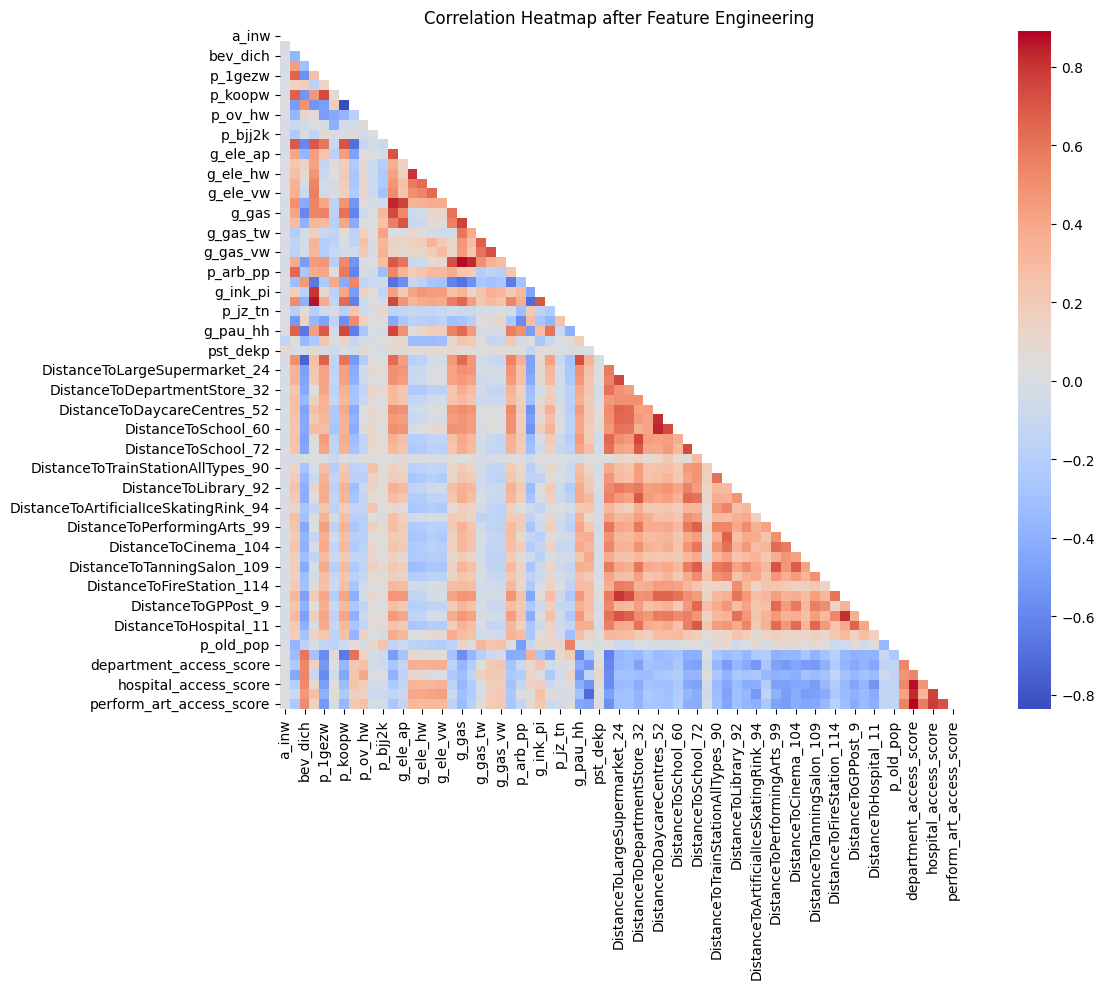

In [176]:
num_cols_new = df.select_dtypes(include=['float64', 'int64']).columns
num_cols_df = df[num_cols_new].copy()

# Remove low-variance features
low_var_threshold = 0.005 # 0.005 threshold
variance = num_cols_df.var()
low_var_columns = variance[variance < low_var_threshold].index.tolist()
print(f"Low variance columns to drop: {low_var_columns}")
num_cols_df.drop(columns=low_var_columns, inplace=True)

# Remove highly correlated features
corr_matrix_new = num_cols_df.corr()
corr_abs = num_cols_df.corr().abs()
high_correlation_pairs = []
for i in range(len(corr_abs.columns)):
    for j in range(i + 1, len(corr_abs.columns)):
        if abs(corr_abs.iloc[i, j]) > 0.9: # 0.9 threshold
            high_correlation_pairs.append(
                (corr_abs.columns[i], corr_abs.columns[j], corr_abs.iloc[i, j])
            )

# Create DataFrame of highly correlated features
high_correlation_df = pd.DataFrame(
    high_correlation_pairs, columns=["Feature 1", "Feature 2", "Correlation"]
)

# Print highly correlated features
print("Highly correlated features:")
print(high_correlation_df)

# Identify columns to drop (keeping the first feature, dropping the second)
highly_correlated = high_correlation_df["Feature 2"].unique().tolist()
print("\nColumns to be dropped:")
print(highly_correlated)

# Drop highly correlated features
num_cols_df.drop(columns=highly_correlated, inplace=True)

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(num_cols_df.corr(), dtype=bool))

# Visualize correlations
plt.figure(figsize=(14, 10))
sns.heatmap(
    num_cols_df.corr(), 
    cmap="coolwarm", 
    annot=False, 
    fmt='.2f',
    mask=mask,  
    square=True  
)
plt.title("Correlation Heatmap after Feature Engineering")
plt.tight_layout()  # Adjusts the plot to ensure everything fits
plt.show()

In [178]:
# Check the revised numeric features
print(num_cols_df.shape)
display(num_cols_df.head())

(14015, 69)


,a_inw,g_hhgro,bev_dich,g_wozbag,p_1gezw,p_bewndw,p_koopw,p_wcorpw,p_ov_hw,p_e_o_w,p_bjj2k,g_ele,g_ele_ap,g_ele_tw,g_ele_hw,g_ele_2w,g_ele_vw,g_ele_hu,g_gas,g_gas_ap,g_gas_tw,g_gas_2w,g_gas_vw,g_gas_hu,p_arb_pp,p_arb_wn,g_ink_pi,m_hh_ver,p_jz_tn,p_wmo_t,g_pau_hh,pst_mvp,pst_dekp,ste_mvs,DistanceToLargeSupermarket_24,DistanceToShopForOtherDailyFood_28,DistanceToDepartmentStore_32,DistanceToCafeEtc_36,DistanceToDaycareCentres_52,DistanceToOutOfSchoolCare_56,DistanceToSchool_60,DistanceToSchool_64,DistanceToSchool_72,DistanceToMainRoadEntrance_89,DistanceToTrainStationAllTypes_90,DistanceToImportantTransferStation_91,DistanceToLibrary_92,DistanceToSwimmingPool_93,DistanceToArtificialIceSkatingRink_94,DistanceToMuseum_95,DistanceToPerformingArts_99,DistanceToPopMusicVenue_103,DistanceToCinema_104,DistanceToSauna_108,DistanceToTanningSalon_109,DistanceToAttraction_110,DistanceToFireStation_114,DistanceToGPPractice_5,DistanceToGPPost_9,DistanceToPharmacy_10,DistanceToHospital_11,r_man_to_women,p_old_pop,s_nonwestern,department_access_score,cafe_access_score,hospital_access_score,attraction_access_score,perform_art_access_score
0,17475415,2.10,519.00,290.00,64.00,96.00,57.00,29.00,14.00,0.00,82.00,2810.00,2040.00,2870.00,3000.00,3370.00,4190.00,2140.00,1250.00,840.00,1180.00,1650.00,2150.00,970.00,69.00,83.00,29.10,88.40,10.50,NaN,1.10,NaN,NaN,2.00,1.00,0.80,2.70,1.40,0.70,0.80,0.80,2.50,3.40,1.90,5.30,10.80,2.00,3.40,19.50,4.30,4.90,10.20,6.50,8.40,4.20,5.60,2.20,1.10,6.90,1.30,4.90,0.99,0.20,0.14,7.15,18.19,3.14,12.34,6.76
1,233273,1.70,1257.00,225.00,40.00,96.00,40.00,33.00,27.00,0.00,83.00,2250.00,1830.00,2570.00,2740.00,3170.00,3960.00,1910.00,1190.00,950.00,1320.00,1690.00,2290.00,1000.00,65.00,87.00,26.80,11.00,8.50,71.00,0.70,NaN,NaN,1.00,0.80,0.80,2.10,1.10,0.60,0.60,0.80,1.80,2.10,1.20,2.70,3.90,1.60,2.60,5.30,3.40,3.20,3.50,3.50,13.00,2.70,3.80,2.80,0.90,5.90,1.10,3.30,0.99,0.15,0.12,6.63,36.11,2.14,5.74,6.30
2,22735,1.30,10059.00,218.00,14.00,92.00,16.00,27.00,57.00,0.00,86.00,2020.00,1900.00,2670.00,2920.00,3140.00,3680.00,1930.00,1090.00,1010.00,1570.00,2530.00,2650.00,1030.00,62.00,86.00,23.80,0.00,1.50,37.00,0.20,NaN,NaN,1.00,0.30,0.20,1.00,0.20,0.50,0.60,0.70,1.00,1.00,1.60,1.20,1.40,1.10,2.50,3.70,0.60,0.60,0.70,0.80,12.40,0.50,2.80,2.30,0.40,4.30,0.70,1.30,1.09,0.08,0.12,7.43,80.78,2.55,6.10,7.40
3,4510,1.20,12192.00,223.00,13.00,90.00,13.00,21.00,67.00,0.00,95.00,2140.00,2020.00,2940.00,2420.00,NaN,NaN,2100.00,1230.00,1140.00,1730.00,NaN,NaN,1160.00,63.00,86.00,22.30,-1.90,1.20,35.00,0.20,9712.00,1.00,1.00,0.30,0.10,0.90,0.20,0.60,0.60,0.50,0.90,0.90,1.80,1.30,1.30,0.80,2.40,3.60,0.40,0.70,0.90,0.70,12.40,0.70,2.80,2.40,0.40,4.30,0.50,1.30,1.12,0.06,0.10,7.40,84.12,2.50,6.10,7.40
4,6410,1.20,11651.00,223.00,9.00,89.00,13.00,27.00,60.00,1.00,96.00,2080.00,1970.00,3110.00,3620.00,4220.00,3980.00,1990.00,1170.00,1100.00,1850.00,3360.00,2340.00,1110.00,63.00,85.00,22.80,-1.90,1.20,30.00,0.20,9711.00,1.00,1.00,0.30,0.10,0.90,0.10,0.60,0.60,0.80,1.00,1.00,1.40,0.90,0.90,1.10,2.80,4.00,0.50,0.60,0.60,0.50,12.00,0.40,2.50,2.00,0.30,3.90,0.80,1.30,1.14,0.07,0.12,7.40,92.39,2.80,6.10,7.40


<h2>4.0: Unsupervised learning</h2>

<h3>4.1: Transforming the target variable into categorical</h3>

In [64]:
# Transfroming 'g_ink_pi' to categorical 
# Equal-width bins
def create_equal_width_bins(df, n_bins=5):
    """
    Creates equal-width income categories. Each bin has the same width in terms of income range, 
    but may contain different numbers of observations.
    """
    df['income_cat_equal_width'] = pd.cut(
        df['g_ink_pi'],
        bins=n_bins,
        labels=['Very Low', 'Low', 'Medium', 'High', 'Very High']
    )
    return df

# Next, let's create equal-frequency bins (quantiles)
def create_equal_freq_bins(df, n_bins=5):
    """
    Creates equal-frequency income categories (quantiles).
    Each bin contains approximately the same number of observations.
    """
    df['income_cat_equal_freq'] = pd.qcut(
        df['g_ink_pi'],
        q=n_bins,
        labels=['Very Low', 'Low', 'Medium', 'High', 'Very High']
    )
    return df

# Finally, let's create custom bins based on statistical properties
def create_custom_stat_bins(df):
    """
    Creates income categories based on mean and standard deviation.
    This creates categories that reflect the statistical distribution of income.
    """
    mean = df['g_ink_pi'].mean()
    std = df['g_ink_pi'].std()
    
    # Define custom boundaries using mean and standard deviation
    custom_bins = [
        df['g_ink_pi'].min(),  # Minimum value
        mean - std,            # Mean - 1 standard deviation
        mean - 0.5 * std,     # Mean - 0.5 standard deviation
        mean + 0.5 * std,     # Mean + 0.5 standard deviation
        mean + std,           # Mean + 1 standard deviation
        df['g_ink_pi'].max()  # Maximum value
    ]
    
    # Create categories using these custom bins
    df['income_cat_custom'] = pd.cut(
        df['g_ink_pi'],
        bins=custom_bins,
        labels=['Very Low', 'Low', 'Medium', 'High', 'Very High']
    )
    return df

# Let's create a function that applies all three methods and shows some summary statistics
def create_all_income_categories(df, n_bins=5):
    """
    Applies all three binning methods and returns the dataframe with new columns
    along with some summary statistics about the categories.
    """
    # Make sure we're working with a copy
    df = df.copy()
    
    # Apply all three binning methods
    df = create_equal_width_bins(df, n_bins)
    df = create_equal_freq_bins(df, n_bins)
    df = create_custom_stat_bins(df)
    
    # Print summary statistics for each categorization method
    print("\nEqual-width binning summary:")
    print(df['income_cat_equal_width'].value_counts().sort_index())
    
    print("\nEqual-frequency binning summary:")
    print(df['income_cat_equal_freq'].value_counts().sort_index())
    
    print("\nCustom statistical binning summary:")
    print(df['income_cat_custom'].value_counts().sort_index())
    
    return df

df = create_all_income_categories(df)


Equal-width binning summary:
income_cat_equal_width
Very Low     5014
Low          8822
Medium        161
High           16
Very High       2
Name: count, dtype: int64

Equal-frequency binning summary:
income_cat_equal_freq
Very Low     2822
Low          2837
Medium       2799
High         2808
Very High    2749
Name: count, dtype: int64

Custom statistical binning summary:
income_cat_custom
Very Low     1409
Low          2638
Medium       6928
High         1492
Very High    1547
Name: count, dtype: int64


<h3>4.2: PCA & TSNE</h3>


Best performing strategy: income_category_stat


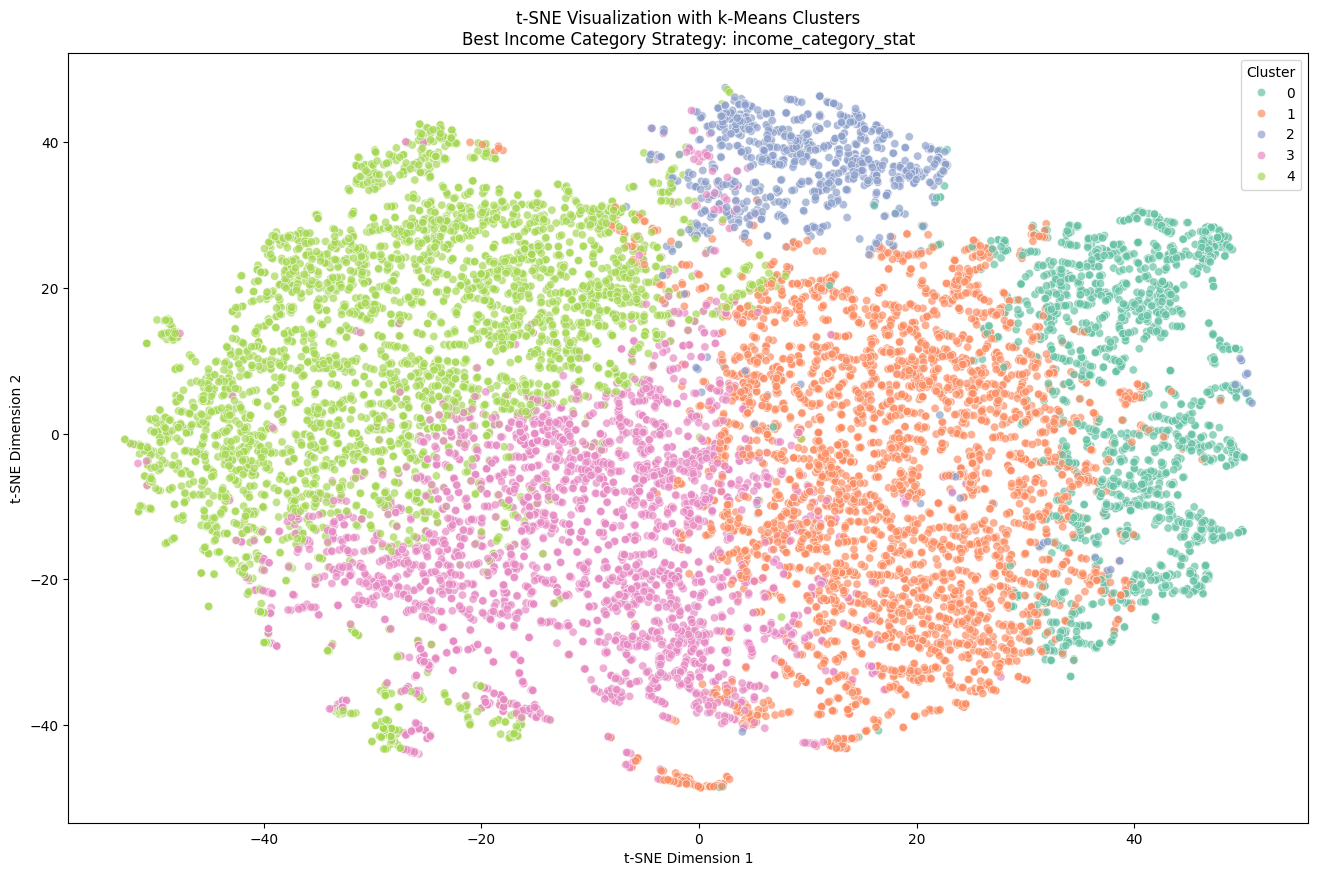

In [192]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, confusion_matrix

# First, identify the target variables to exclude
target_col = df["g_ink_pi"]  # Original income variable
income_category = df["income_category"] if "income_category" in df.columns else None

# Get numerical columns while excluding the target variables
num_cols_again = df.select_dtypes(include=['float64', 'int64']).columns
num_cols_again = [col for col in num_cols_again if col not in ["g_ink_pi", "income_category"]]

# Create DataFrame with only the selected numerical columns
num_cols_again_df = df[num_cols_again].copy()

def evaluate_clustering(X, clusters, target_labels, strategy_name):
    """
    Evaluate clustering performance using multiple metrics.
    
    Parameters:
    X: array-like - The transformed feature matrix
    clusters: array-like - Predicted cluster labels
    target_labels: array-like - True target labels
    strategy_name: str - Name of the binning strategy being evaluated
    
    Returns:
    dict - Dictionary containing various clustering metrics
    """
    print {
        'name': strategy_name,
        'silhouette': silhouette_score(X, clusters),
        'davies_bouldin': davies_bouldin_score(X, clusters),
        'nmi': normalized_mutual_info_score(target_labels, clusters),
        'ari': adjusted_rand_score(target_labels, clusters)
    }
    return {
        'name': strategy_name,
        'silhouette': silhouette_score(X, clusters),
        'davies_bouldin': davies_bouldin_score(X, clusters),
        'nmi': normalized_mutual_info_score(target_labels, clusters),
        'ari': adjusted_rand_score(target_labels, clusters)
    }

def create_and_evaluate_binning(df, num_cols_df, n_clusters=5):
    """
    Create different income categories and evaluate clustering performance for each.
    """
    df = df.copy()
    
    # Create the three different binning strategies
    # Equal-width bins
    df['income_category_width'] = pd.cut(
        df['g_ink_pi'], 
        bins=5,
        labels=list(range(5))
    )
    
    # Equal-frequency bins
    df['income_category_freq'] = pd.qcut(
        df['g_ink_pi'],
        q=5,
        labels=list(range(5))
    )
    
    # Statistical bins
    mean = df['g_ink_pi'].mean()
    std = df['g_ink_pi'].std()
    custom_bins = [
        df['g_ink_pi'].min(),
        mean - std,
        mean - 0.5*std,
        mean + 0.5*std,
        mean + std,
        df['g_ink_pi'].max()
    ]
    df['income_category_stat'] = pd.cut(
        df['g_ink_pi'],
        bins=custom_bins,
        labels=list(range(5))
    )
    
    # Imputation and scaling pipeline
    imputer = SimpleImputer(strategy='median')
    df_numeric_filled = pd.DataFrame(
        imputer.fit_transform(num_cols_df),
        columns=num_cols_df.columns
    )
    
    scaler = MinMaxScaler()
    df_scaled = pd.DataFrame(
        scaler.fit_transform(df_numeric_filled),
        columns=df_numeric_filled.columns
    )
    
    # Apply PCA
    pca = PCA(n_components=30)
    X_pca = pca.fit_transform(df_scaled)
    
    # Apply t-SNE
    tsne = TSNE(learning_rate=50, random_state=42)
    transformed = tsne.fit_transform(X_pca)
    
    # Apply k-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(X_pca)
    
    # Evaluate each binning strategy
    results = []
    for col in ['income_category_width', 'income_category_freq', 'income_category_stat']:
        # Only consider non-NaN values for evaluation
        mask = ~df[col].isna()
        if mask.any():
            target_labels = df[col][mask].values
            cluster_subset = clusters[mask]
            X_pca_subset = X_pca[mask]
            
            result = evaluate_clustering(X_pca_subset, cluster_subset, target_labels, col)
            results.append(result)
    
    # Find best strategy based on metrics
    for result in results:
        result['combined_score'] = (0.5 * result['silhouette'] + 
                                  0.3 * result['nmi'] + 
                                  0.2 * (1 - result['davies_bouldin']/max(r['davies_bouldin'] for r in results)))
    
    best_strategy = max(results, key=lambda x: x['combined_score'])
    print(f"\nBest performing strategy: {best_strategy['name']}")
    
    # Keep only the best performing categorization
    best_col = best_strategy['name']
    df = df.rename(columns={best_col: 'income_category'})
    df = df.drop([col for col in ['income_category_width', 'income_category_freq', 'income_category_stat'] 
                 if col != best_col], axis=1)
    
    # Create visualization
    plot_clustering_results(transformed, clusters, best_strategy['name'])
    
    return df, best_strategy

def plot_clustering_results(transformed, clusters, strategy_name):
    """
    Create visualization of clustering results
    """
    df_subset = pd.DataFrame({
        'tsne_1': transformed[:, 0],
        'tsne_2': transformed[:, 1],
        'cluster': clusters
    })
    
    plt.figure(figsize=(16, 10))
    sns.scatterplot(
        x="tsne_1", y="tsne_2",
        hue="cluster",
        palette=sns.color_palette('Set2', n_colors=len(np.unique(clusters))),
        data=df_subset,
        legend="full",
        alpha=0.7
    )
    plt.title(f"t-SNE Visualization with k-Means Clusters\nBest Income Category Strategy: {strategy_name}")
    plt.xlabel("t-SNE Dimension 1")
    plt.ylabel("t-SNE Dimension 2")
    plt.legend(title="Cluster")
    plt.show()

# Run the binning and clustering analysis
df, best_strategy = create_and_evaluate_binning(df, num_cols_again_df, n_clusters=5)

<h6>Interpreting the performance of the clustering and the plot:</h6>
<p></p>

<h2>5.0: Supervised learning</h2>

Shape of PCA transformed data: (14015, 30)

Total variance explained by 30 components: 92.40%


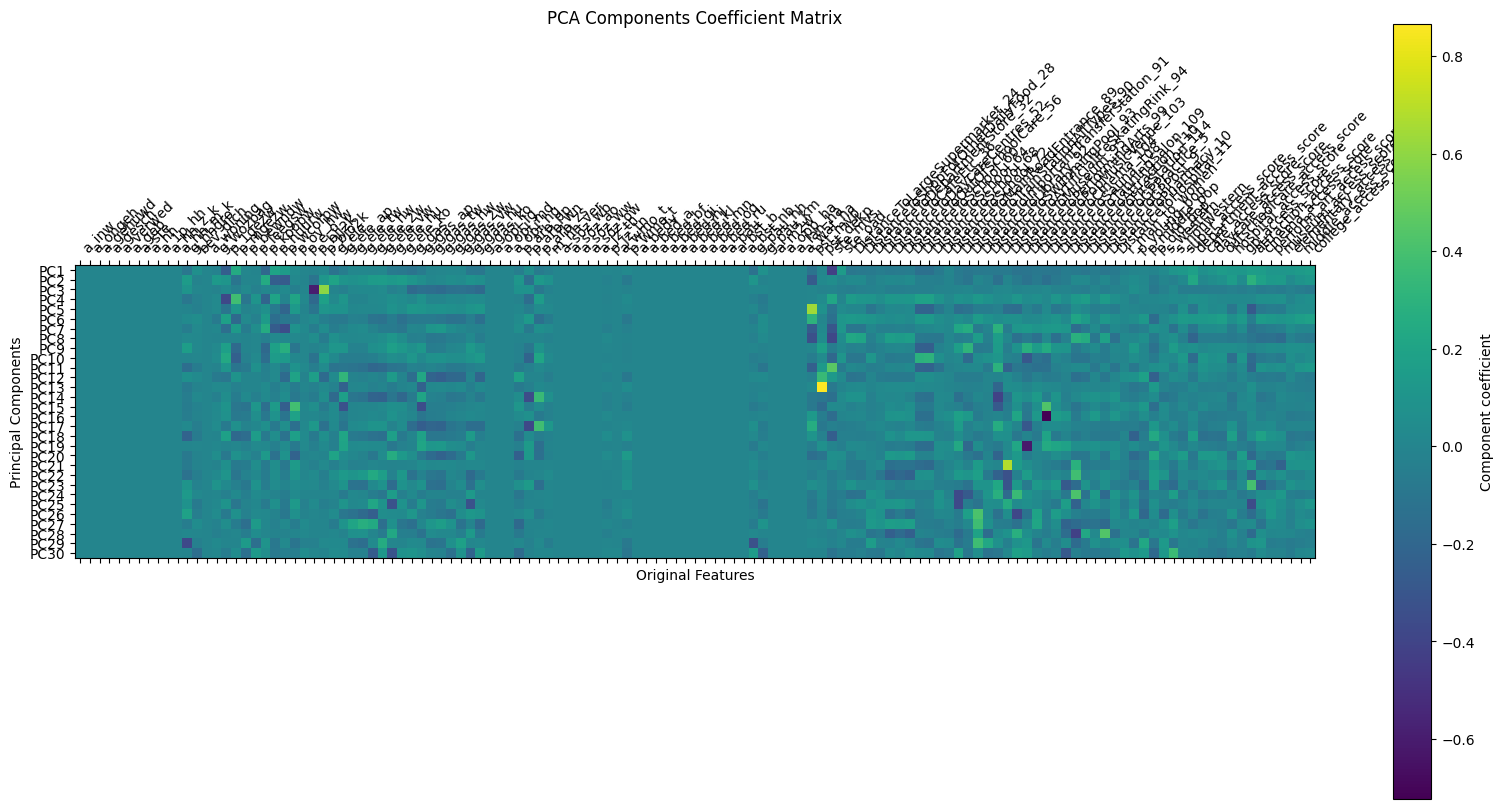

<Figure size 2000x600 with 0 Axes>

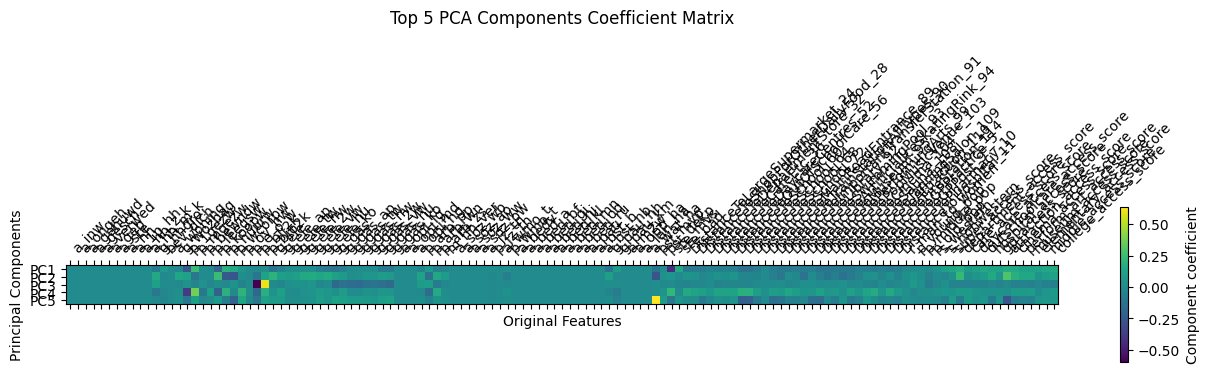

In [233]:
from sklearn.impute import SimpleImputer

# First let's handle any missing values in our numerical data using median imputation
imputer = SimpleImputer(strategy='median')
df_numeric_filled = pd.DataFrame(
    imputer.fit_transform(num_cols_again_df),
    columns=num_cols_again_df.columns
)

# Next, scale our data to a 0-1 range since PCA is sensitive to scale
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(
    scaler.fit_transform(df_numeric_filled),
    columns=df_numeric_filled.columns
)

# Now apply PCA transformation with 30 components
pca = PCA(n_components=30)
X_pca = pca.fit_transform(df_scaled)

# Convert the PCA result to a DataFrame with meaningful column names
df_pca = pd.DataFrame(
    X_pca,
    columns=[f'PC{i+1}' for i in range(30)],
    index=df.index
)

# You can examine how much variance is explained by each component
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

print("Shape of PCA transformed data:", df_pca.shape)
print("\nTotal variance explained by 30 components: {:.2%}".format(cumulative_variance[-1]))


# Create a visualization of PCA components and their relationship to original features
plt.figure(figsize=(20, 10))
plt.matshow(pca.components_, cmap='viridis', fignum=1)
plt.colorbar(label='Component coefficient')
plt.yticks(
    range(pca.components_.shape[0]),
    [f"PC{i+1}" for i in range(pca.components_.shape[0])]
)
plt.xticks(
    range(len(df_scaled.columns)),
    df_scaled.columns,
    rotation=45,
    ha='left'
)

# Add title and labels
plt.title("PCA Components Coefficient Matrix", pad=20)
plt.xlabel("Original Features")
plt.ylabel("Principal Components")

# Show the plot
plt.show()

# Let's also create a more focused view of just the top 5 components
plt.figure(figsize=(20, 6))
plt.matshow(pca.components_[:5], cmap='viridis', fignum=2)
plt.colorbar(label='Component coefficient')

# Set y-axis labels for top 5 components
plt.yticks(
    range(5),
    [f"PC{i+1}" for i in range(5)]
)

# Set x-axis labels (original features)
plt.xticks(
    range(len(df_scaled.columns)),
    df_scaled.columns,
    rotation=45,
    ha='left'
)

plt.title("Top 5 PCA Components Coefficient Matrix", pad=20)
plt.xlabel("Original Features")
plt.ylabel("Principal Components")
plt.show()

In [215]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, cross_validate, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, classification_report
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from scipy.stats import randint, uniform

# First, handle missing values in target variable
y = df['income_category']
X = df_pca

valid_mask = ~y.isna()
X_valid = X[valid_mask]
y_valid = y[valid_mask]

print(f"Original dataset size: {len(y)}")
print(f"Dataset size after removing null targets: {len(y_valid)}")
print(f"Removed {len(y) - len(y_valid)} samples with missing target values")

# Create train-test split before any preprocessing
# We use stratify to maintain the same class distribution in both sets
X_train, X_test, y_train, y_test = train_test_split(
    X_valid, 
    y_valid, 
    test_size=0.2,  # Keep 20% for testing
    random_state=42,
    stratify=y_valid  # Maintain class distribution
)

print("\nTrain-Test Split Summary:")
print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")
print("\nClass distribution in training set:")
print(y_train.value_counts(normalize=True))
print("\nClass distribution in test set:")
print(y_test.value_counts(normalize=True))

# Create scoring metrics
scoring = {
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

# The pipeline definitions remain the same
rf_pipeline = ImbPipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])

knn_pipeline = ImbPipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', KNeighborsClassifier())
])

svc_pipeline = ImbPipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LinearSVC(random_state=42, dual=False))
])

# Parameter spaces remain the same
rf_params = {
    'imputer__strategy': ['mean', 'median'],
    'classifier__n_estimators': randint(50, 150),
    'classifier__max_depth': randint(5, 15),
    'classifier__min_samples_split': randint(2, 10),
    'classifier__min_samples_leaf': randint(1, 5),
    'smote__k_neighbors': [3, 5, 7]
}

knn_params = {
    'imputer__strategy': ['mean', 'median'],
    'classifier__n_neighbors': randint(3, 20),
    'classifier__weights': ['uniform', 'distance'],
    'classifier__p': [1, 2],
    'smote__k_neighbors': [3, 5, 7]
}

svc_params = {
    'imputer__strategy': ['mean', 'median'],
    'classifier__C': uniform(0.1, 10),
    'classifier__class_weight': ['balanced', None],
    'smote__k_neighbors': [3, 5, 7]
}

pipelines = {
    'RandomForest': (rf_pipeline, rf_params),
    'KNN': (knn_pipeline, knn_params),
    'LinearSVC': (svc_pipeline, svc_params)
}

# Cross-validation on training data only
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

best_models = {}
best_scores = {}
test_scores = {}

# Train and evaluate each classifier
for name, (pipeline, params) in pipelines.items():
    print(f"\nTraining {name} classifier...")
    
    random_search = RandomizedSearchCV(
        estimator=pipeline,
        param_distributions=params,
        n_iter=20,
        scoring='f1_weighted',
        cv=cv,
        verbose=1,
        n_jobs=-1,
        random_state=42,
        refit=True
    )
    
    # Fit the random search on training data only
    random_search.fit(X_train, y_train)
    
    # Store best model and cross-validation score
    best_models[name] = random_search.best_estimator_
    best_scores[name] = random_search.best_score_
    
    # Evaluate on test set
    y_pred = random_search.predict(X_test)
    test_scores[name] = f1_score(y_test, y_pred, average='weighted')
    
    print(f"\nBest parameters for {name}:")
    print(random_search.best_params_)
    print(f"Best cross-validation score: {random_search.best_score_:.3f}")
    print(f"Test set score: {test_scores[name]:.3f}")
    
    # Detailed classification report on test set
    print(f"\nDetailed Classification Report for {name} on Test Set:")
    print(classification_report(y_test, y_pred))

# Create comprehensive summary DataFrame
summary_df = pd.DataFrame({
    'Classifier': best_scores.keys(),
    'CV F1 Score': best_scores.values(),
    'Test F1 Score': test_scores.values(),
    'CV-Test Difference': [cv_score - test_scores[name] for name, cv_score in best_scores.items()],
    'Imputation Strategy': [m.named_steps['imputer'].strategy for m in best_models.values()]
})

print("\nModel Comparison Summary:")
print(summary_df.sort_values('Test F1 Score', ascending=False))

# Find best overall model based on test performance
best_classifier = max(test_scores.items(), key=lambda x: x[1])
print(f"\nBest overall classifier: {best_classifier[0]} with test f1-score: {best_classifier[1]:.3f}")

import joblib
joblib.dump(best_models[best_classifier[0]], 'best_model.joblib')

Original dataset size: 14015
Dataset size after removing null targets: 14014
Removed 1 samples with missing target values

Train-Test Split Summary:
Training set size: 11211
Test set size: 2803

Class distribution in training set:
income_category
2   0.49
1   0.19
4   0.11
3   0.11
0   0.10
Name: proportion, dtype: float64

Class distribution in test set:
income_category
2   0.49
1   0.19
4   0.11
3   0.11
0   0.10
Name: proportion, dtype: float64

Training RandomForest classifier...
Fitting 3 folds for each of 20 candidates, totalling 60 fits

Best parameters for RandomForest:
{'classifier__max_depth': 14, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 3, 'classifier__n_estimators': 102, 'imputer__strategy': 'median', 'smote__k_neighbors': 7}
Best cross-validation score: 0.608
Test set score: 0.639

Detailed Classification Report for RandomForest on Test Set:
              precision    recall  f1-score   support

           0       0.68      0.75      0.71       2

['best_model.joblib']


Model Performance Metrics:
------------------------------
Accuracy: 0.631
Precision: 0.657
Recall: 0.631
F1 Score: 0.639

Detailed Classification Report:
------------------------------
              precision    recall  f1-score   support

           0       0.68      0.75      0.71       282
           1       0.52      0.61      0.56       528
           2       0.79      0.65      0.71      1386
           3       0.32      0.40      0.36       298
           4       0.62      0.68      0.65       309

    accuracy                           0.63      2803
   macro avg       0.58      0.62      0.60      2803
weighted avg       0.66      0.63      0.64      2803



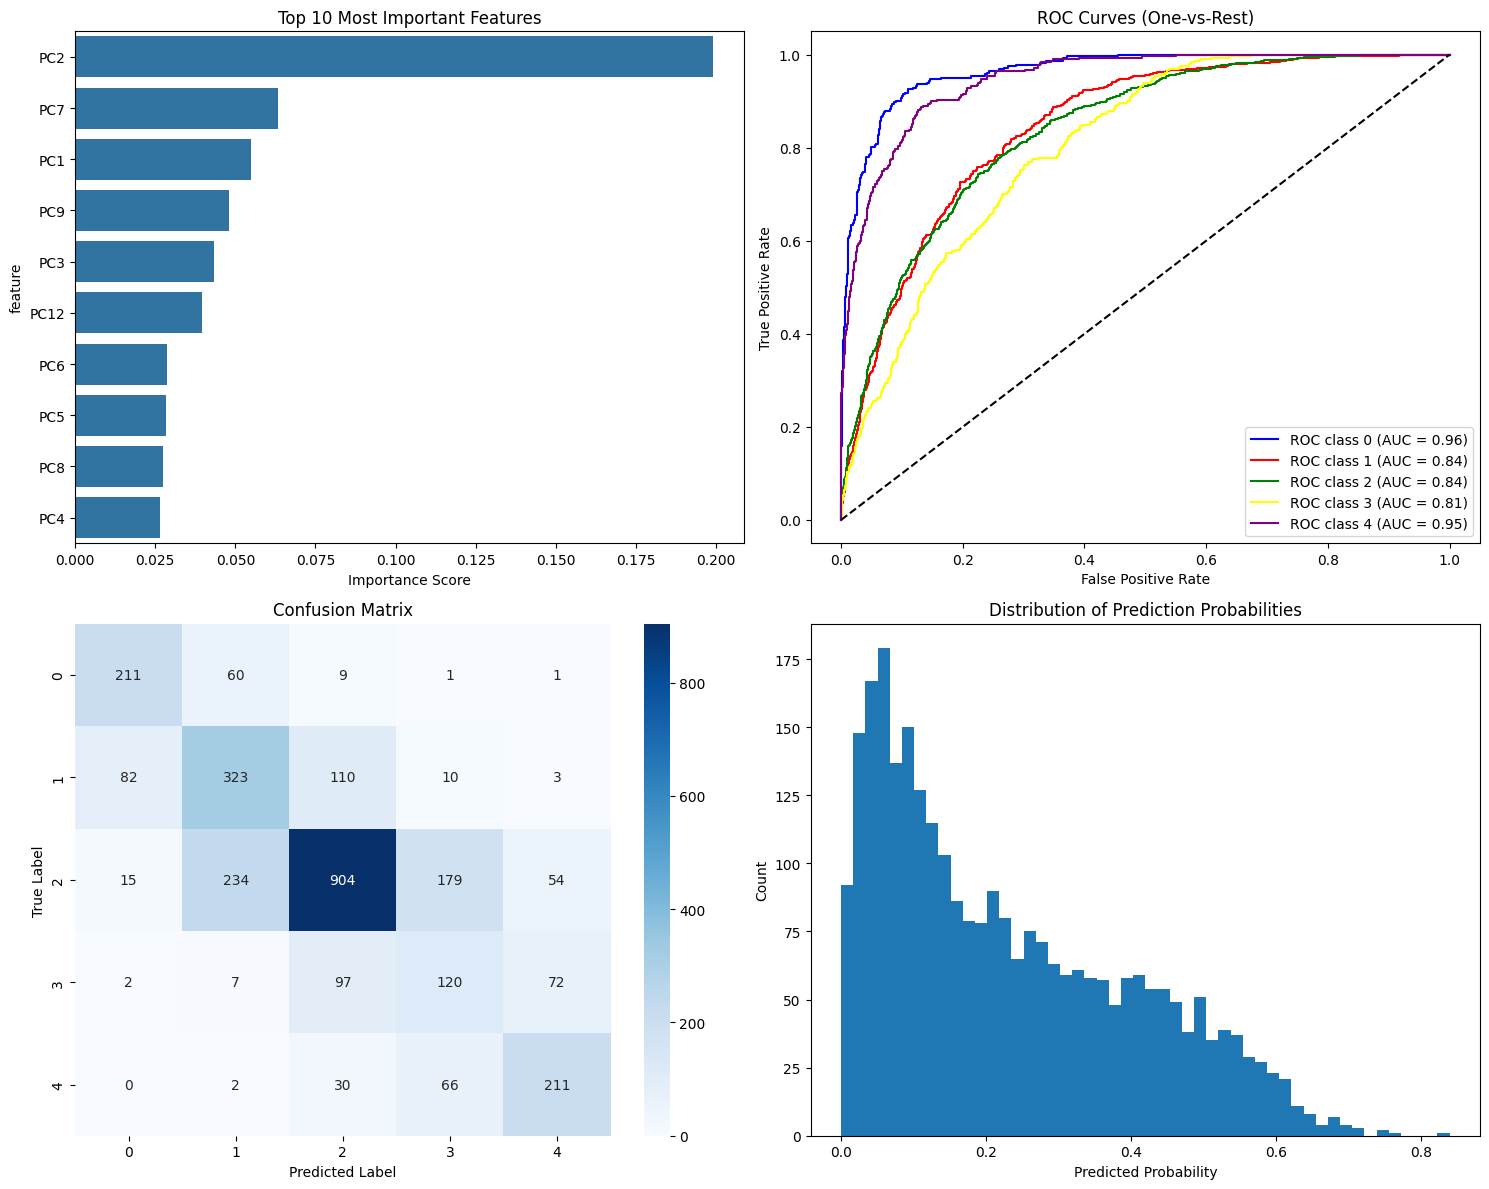


Pipeline Steps:
------------------------------
imputer: SimpleImputer
scaler: StandardScaler
smote: SMOTE
classifier: RandomForestClassifier

Random Forest Parameters:
bootstrap: True
ccp_alpha: 0.0
class_weight: None
criterion: gini
max_depth: 14
max_features: sqrt
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 3
min_weight_fraction_leaf: 0.0
monotonic_cst: None
n_estimators: 102
n_jobs: None
oob_score: False
random_state: 42
verbose: 0
warm_start: False


In [223]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                           f1_score, classification_report, confusion_matrix,
                           roc_curve, auc)
from itertools import cycle
from sklearn.preprocessing import label_binarize
from itertools import cycle

def evaluate_pipeline(pipeline, X_train, X_test, y_train, y_test):
    """
    Evaluate a scikit-learn pipeline containing a Random Forest classifier
    
    Parameters:
    pipeline: Trained pipeline with RandomForestClassifier as final step
    X_train, X_test: Training and test feature sets
    y_train, y_test: Training and test target variables
    """
    # Make predictions
    y_pred = pipeline.predict(X_test)
    y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1 Score': f1_score(y_test, y_pred, average='weighted')
    }
    
    # Print metrics
    print("\nModel Performance Metrics:")
    print("-" * 30)
    for metric, value in metrics.items():
        print(f"{metric}: {value:.3f}")
    
    print("\nDetailed Classification Report:")
    print("-" * 30)
    print(classification_report(y_test, y_pred))
    
    # Create visualizations
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # 1. Feature Importance Plot
    # Extract the Random Forest classifier from the pipeline
    rf_classifier = pipeline.named_steps['classifier']
    feature_importance = pd.DataFrame({
        'feature': X_train.columns,
        'importance': rf_classifier.feature_importances_
    }).sort_values('importance', ascending=False)
    
    sns.barplot(data=feature_importance.head(10), 
                x='importance', y='feature', ax=axes[0,0])
    axes[0,0].set_title('Top 10 Most Important Features')
    axes[0,0].set_xlabel('Importance Score')
    
    # 2. ROC Curve
    # Get the number of classes
    n_classes = len(np.unique(y_test))

    # Binarize the test data
    y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

    # Get prediction probabilities for all classes
    y_pred_proba_all = pipeline.predict_proba(X_test)

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba_all[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curves
    colors = cycle(['blue', 'red', 'green', 'yellow', 'purple'])
    for i, color in zip(range(n_classes), colors):
        axes[0,1].plot(fpr[i], tpr[i], color=color, 
                   label=f'ROC class {i} (AUC = {roc_auc[i]:.2f})')

    axes[0,1].plot([0, 1], [0, 1], 'k--')
    axes[0,1].set_xlabel('False Positive Rate')
    axes[0,1].set_ylabel('True Positive Rate')
    axes[0,1].set_title('ROC Curves (One-vs-Rest)')
    axes[0,1].legend()
    
    # 3. Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[1,0])
    axes[1,0].set_title('Confusion Matrix')
    axes[1,0].set_ylabel('True Label')
    axes[1,0].set_xlabel('Predicted Label')
    
    # 4. Prediction Distribution
    axes[1,1].hist(y_pred_proba, bins=50)
    axes[1,1].set_title('Distribution of Prediction Probabilities')
    axes[1,1].set_xlabel('Predicted Probability')
    axes[1,1].set_ylabel('Count')
    
    plt.tight_layout()
    plt.show()
    
    # Print pipeline steps information
    print("\nPipeline Steps:")
    print("-" * 30)
    for name, step in pipeline.named_steps.items():
        print(f"{name}: {type(step).__name__}")
        if name == 'classifier':
            print("\nRandom Forest Parameters:")
            for param, value in step.get_params().items():
                print(f"{param}: {value}")
    
    return metrics, feature_importance

# Get the best Random Forest model
rf_model = best_models['RandomForest']

# Instantiate the evaluationn
metrics, importance = evaluate_pipeline(rf_model, X_train, X_test, y_train, y_test)

<h2>6.0: Further analysis</h2>